**Balanced Portfolio - Jupyter Notebook, Python 3.12.1, September 2024**

In [95]:
import yfinance as yf
import pandas as pd
import ffn as ffn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis, skew
import warnings
warnings.filterwarnings('ignore')

In [96]:
# Download historical data for the SP500 Net Total Return
sp_data = yf.download('^SP500TR', start='1990-01-01', end='2024-09-18')

# MSCI EM Acc Net Return data
em_data = pd.read_csv('data/msci_em_net_return.csv', index_col='Date', parse_dates=True)

# Spot Price Gold Price (GLD)
gold_spot = pd.read_csv('data/gold_prices.csv', index_col='Date', parse_dates=True)

#MSCI WORLD Net Return data
msci_world_data = pd.read_csv('data/msci_world_net_return.csv', index_col='Date', parse_dates=True)


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IYW data fetched from 2000-05-19 to 2024-09-20
WTEC.L data fetched from 2009-02-13 to 2024-09-20
First available date for WTEC.L: 2009-02-13


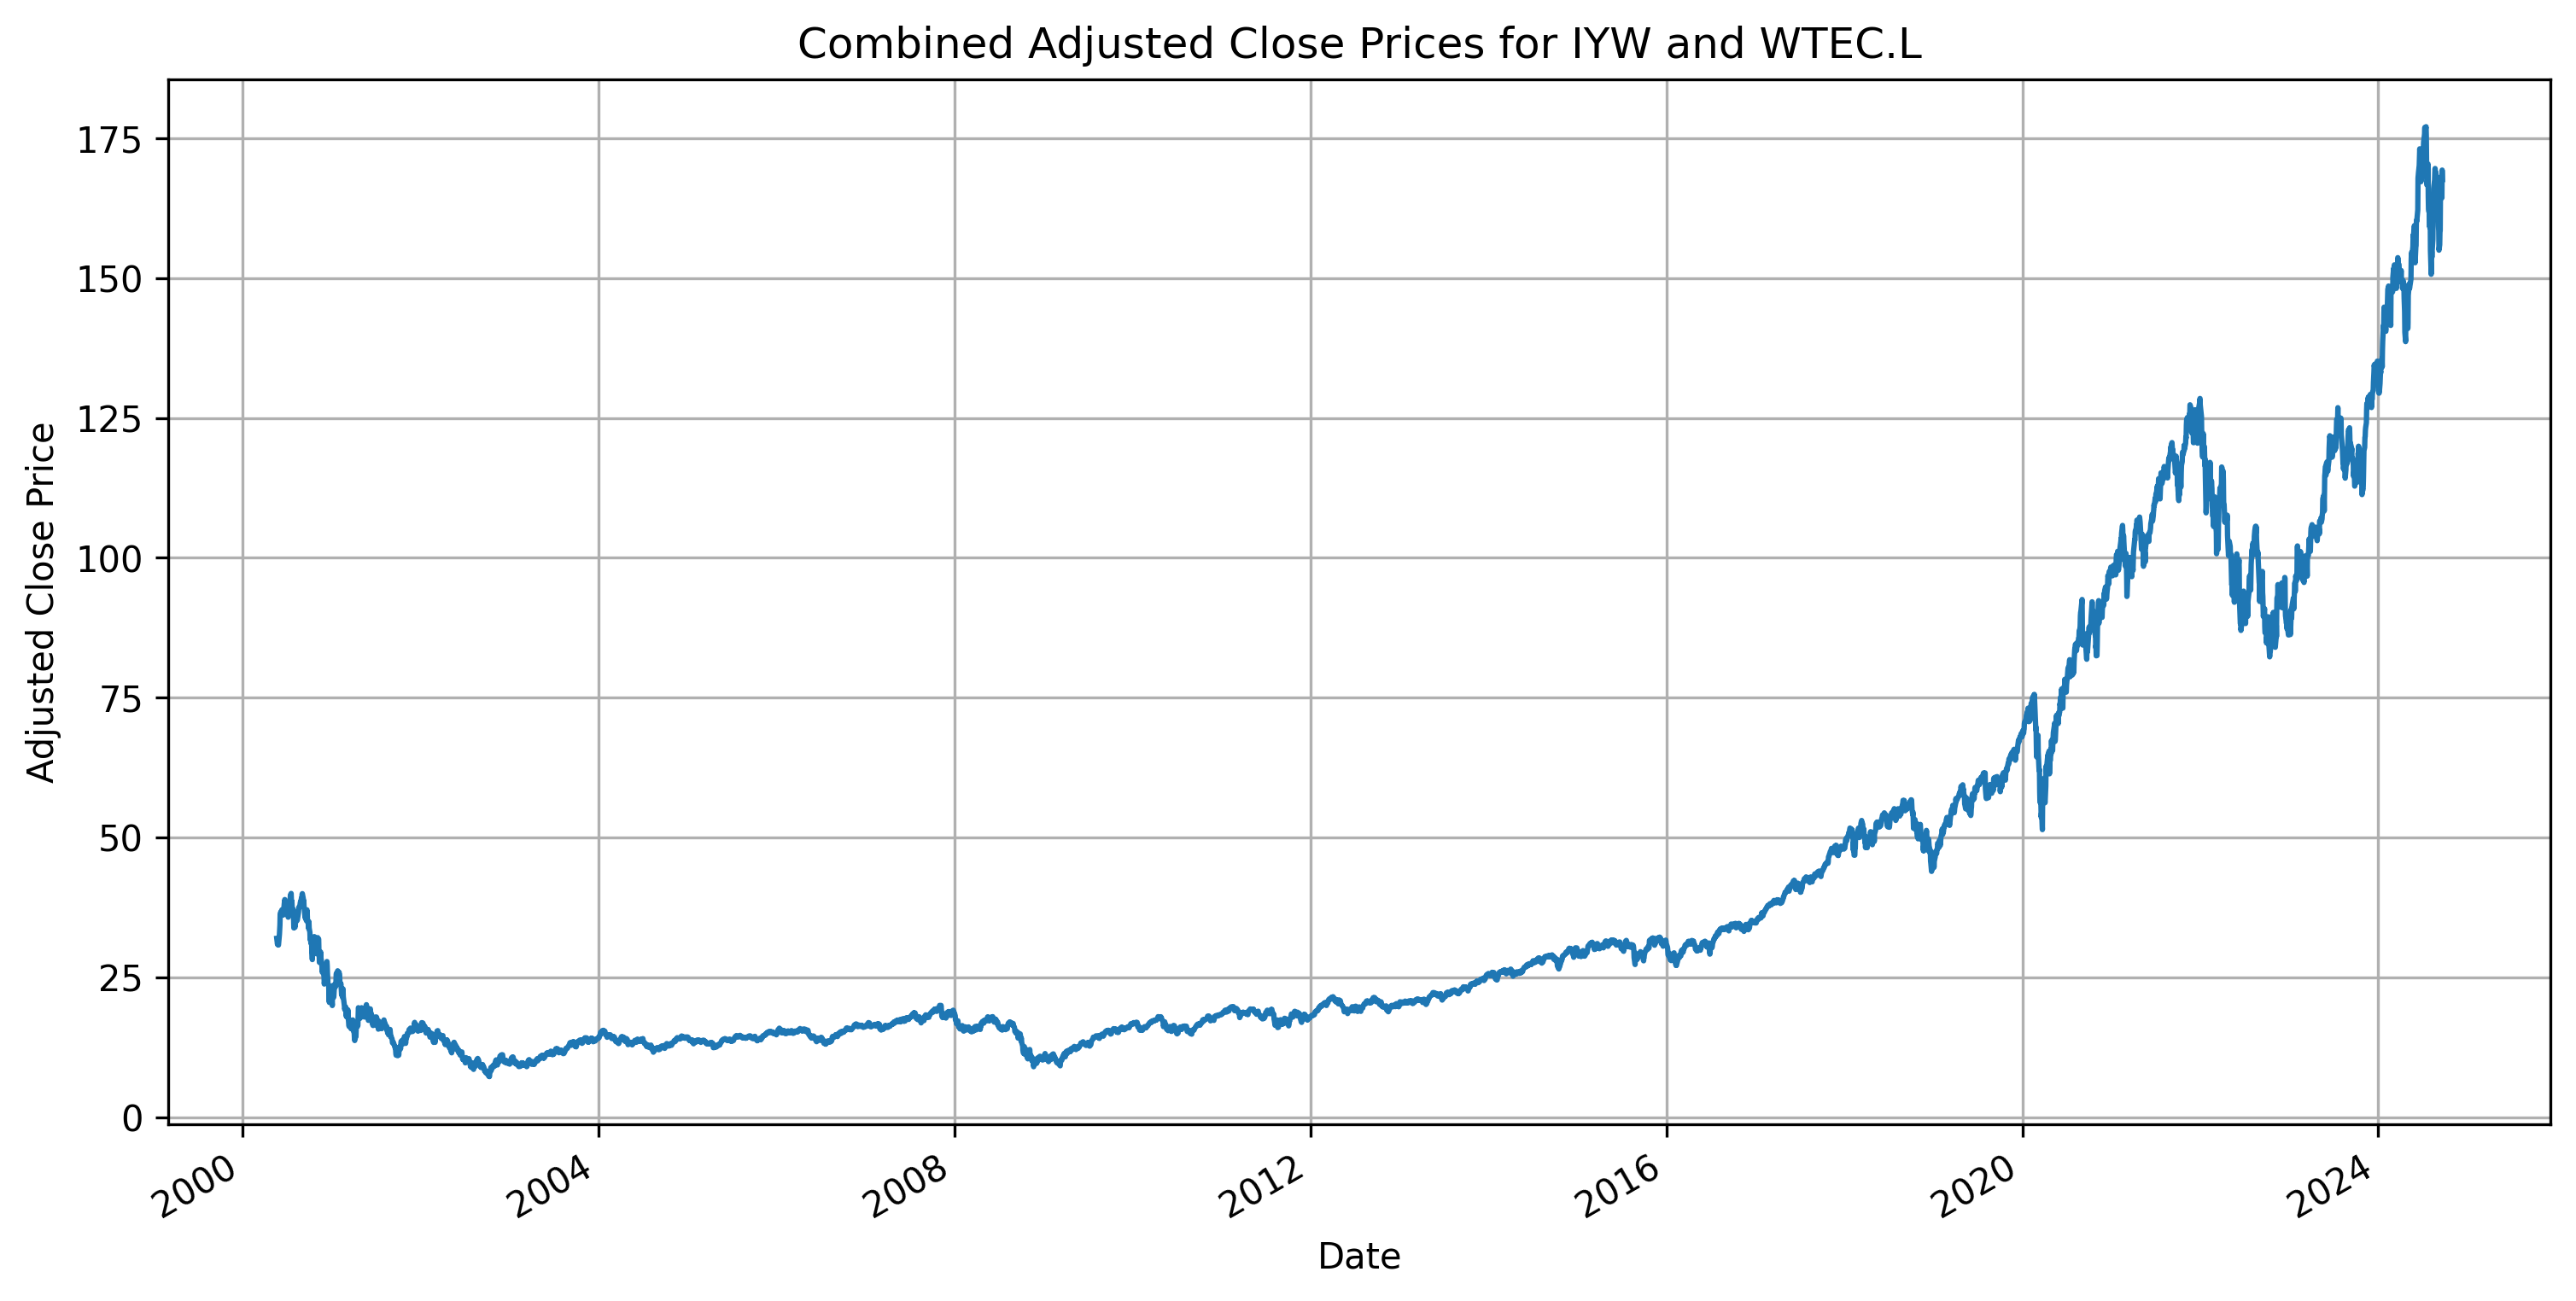

Data successfully concatenated and saved to 'combined_iyw_wtec.csv'


In [97]:
# Fetch data for 'IYW' from earliest date to today
iyw_data = yf.download('IYW', start='1990-01-01')  # Using an early date to get all data available

# Fetch data for 'WTEC.L' from earliest date to today
wtec_data = yf.download('WTEC.L', start='1990-01-01')  # Using an early date to get all data available

# Ensure data was fetched successfully
if iyw_data.empty:
    print("Failed to fetch data for IYW.")
else:
    print(f"IYW data fetched from {iyw_data.index.min().date()} to {iyw_data.index.max().date()}")

if wtec_data.empty:
    print("Failed to fetch data for WTEC.L.")
else:
    print(f"WTEC.L data fetched from {wtec_data.index.min().date()} to {wtec_data.index.max().date()}")

# Proceed only if both datasets are not empty
if not iyw_data.empty and not wtec_data.empty:
    # Get the first date where WTEC.L data is available
    first_wtec_date = wtec_data.first_valid_index()
    print(f"First available date for WTEC.L: {first_wtec_date.date()}")

    # Get IYW data up to the day before WTEC.L data starts
    iyw_data_trimmed = iyw_data[iyw_data.index < first_wtec_date].copy()

    # Ensure there is overlapping data
    if iyw_data_trimmed.empty:
        print("No data available for IYW before WTEC.L starts.")
    else:
        # Get the last 'Adj Close' value of IYW before WTEC.L starts
        last_iyw_value = iyw_data_trimmed['Adj Close'].iloc[-1]

        # Get the first 'Adj Close' value of WTEC.L
        first_wtec_value = wtec_data['Adj Close'].iloc[0]

        # Calculate scaling factor to align the two datasets
        scaling_factor = first_wtec_value / last_iyw_value

        # Scale IYW data to match WTEC.L
        iyw_data_trimmed['Adj Close'] = iyw_data_trimmed['Adj Close'] * scaling_factor

        # Extract 'Adj Close' columns
        iyw_adj_close = iyw_data_trimmed['Adj Close']
        wtec_adj_close = wtec_data['Adj Close']

        # Concatenate the two series
        msci_tech_data = pd.concat([iyw_adj_close, wtec_adj_close])

        # Plot the combined data
        plt.figure(figsize=(12, 6), dpi=300)
        msci_tech_data.plot(title='Combined Adjusted Close Prices for IYW and WTEC.L')
        plt.xlabel('Date')
        plt.ylabel('Adjusted Close Price')
        plt.grid(True)
        plt.show()

        # Optional: Save the combined data to a CSV file
        msci_tech_data.to_csv('combined_iyw_wtec.csv', header=['Adjusted Close'])

        print("Data successfully concatenated and saved to 'combined_iyw_wtec.csv'")

else:
    print("Data fetch failed for one or both tickers.")

[*********************100%***********************]  1 of 1 completed

First available date for EQUA.PA: 2016-06-07


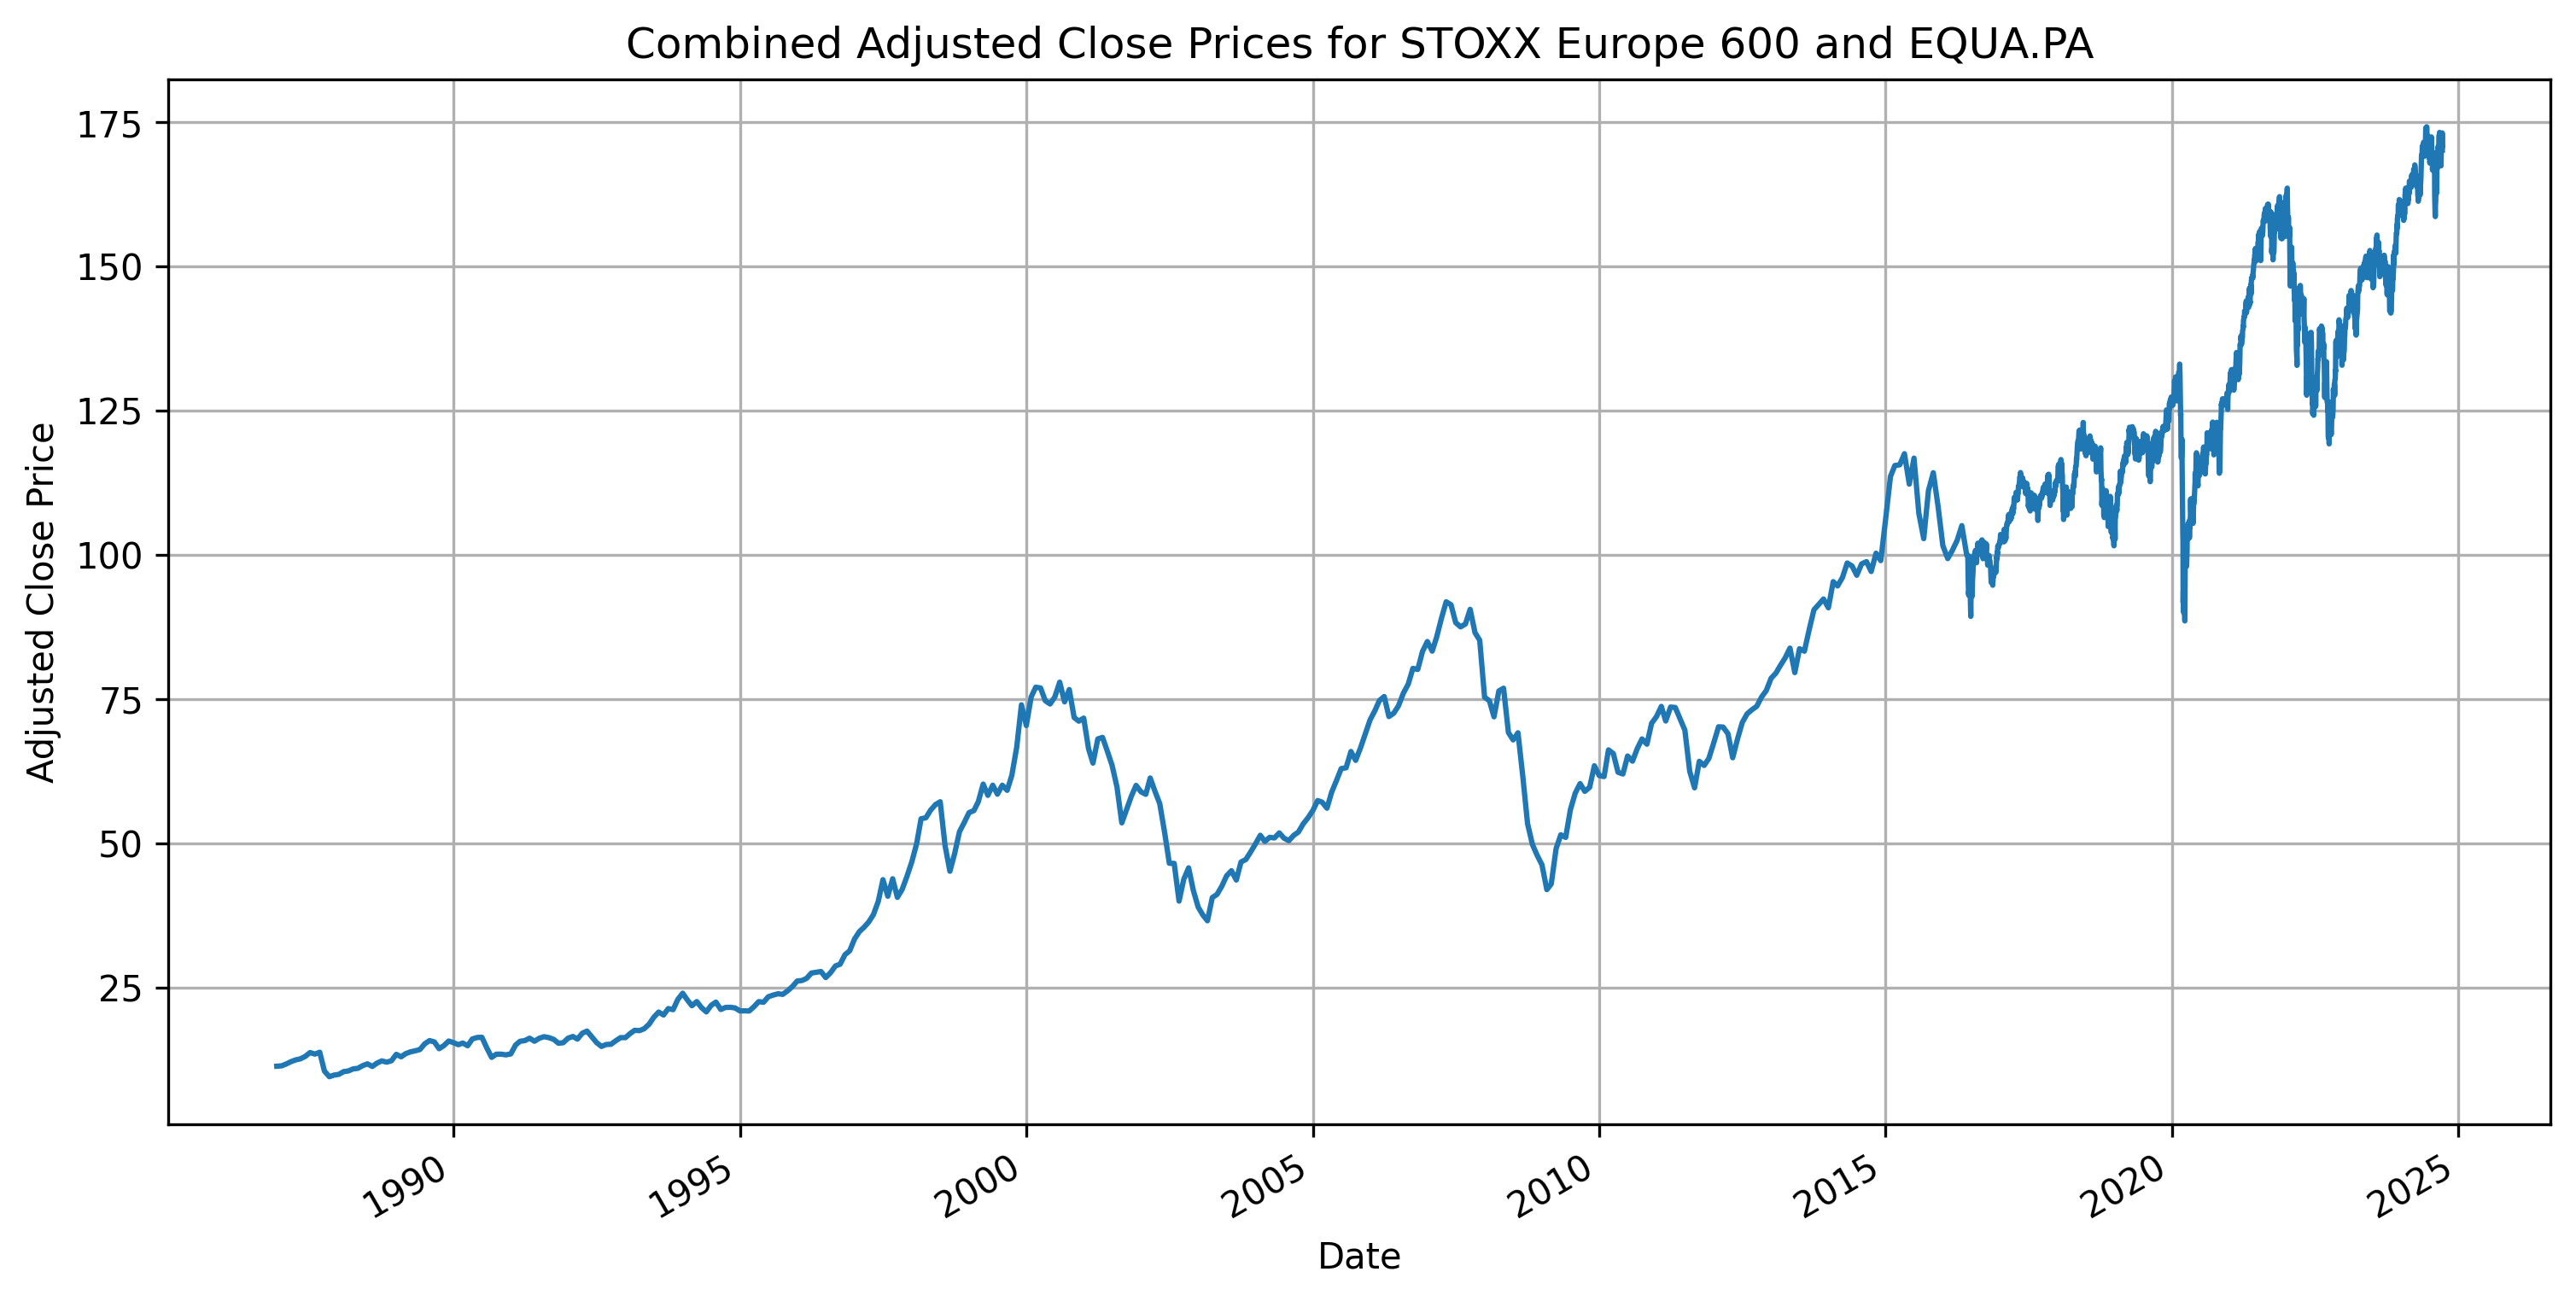

Data successfully concatenated and saved to 'combined_stoxx_equa.csv'


In [98]:
# Load your existing STOXX Europe 600 data
stoxx_data = pd.read_csv('data/stoxx600.csv')

# Fetch data for 'EQUA.PA' from the earliest date to today
equa_data = yf.download('EQUA.PA', start='1990-01-01')  # Start from an early date to get all available data

# Ensure that the 'Date' column in stoxx_data is a datetime object
# Adjust the format if your 'Date' column is in a different format
stoxx_data['Date'] = pd.to_datetime(stoxx_data['Date'], format='%m/%Y')

# Check if data was fetched successfully
if equa_data.empty:
    print("Failed to fetch data for EQUA.PA.")
else:
    # Get the first date where EQUA.PA data is available
    first_equa_date = equa_data.first_valid_index()
    print(f"First available date for EQUA.PA: {first_equa_date.date()}")

    # Get STOXX data up to the day before EQUA.PA data starts
    stoxx_data_trimmed = stoxx_data[stoxx_data['Date'] < first_equa_date].copy()

    # Ensure there is data before EQUA.PA starts
    if stoxx_data_trimmed.empty:
        print("No STOXX Europe 600 data available before EQUA.PA starts.")
    else:
        # Get the last 'STOXX Europe 600' value before EQUA.PA starts
        last_stoxx_value = stoxx_data_trimmed['STOXX Europe 600'].iloc[-1]

        # Get the first 'Adj Close' value of EQUA.PA
        first_equa_value = equa_data['Adj Close'].iloc[0]

        # Calculate scaling factor to align the two datasets
        scaling_factor = first_equa_value / last_stoxx_value

        # Scale STOXX Europe 600 data to match EQUA.PA
        stoxx_data_trimmed['STOXX Europe 600'] = stoxx_data_trimmed['STOXX Europe 600'] * scaling_factor

        # Extract 'STOXX Europe 600' and 'Adj Close' columns
        stoxx_adj_close = stoxx_data_trimmed.set_index('Date')['STOXX Europe 600']
        equa_adj_close = equa_data['Adj Close']

        # Concatenate the two series
        bnp_eu_quality = pd.concat([stoxx_adj_close, equa_adj_close])

        # Plot the combined data
        plt.figure(figsize=(12, 6), dpi=300)
        bnp_eu_quality.plot(title='Combined Adjusted Close Prices for STOXX Europe 600 and EQUA.PA')
        plt.xlabel('Date')
        plt.ylabel('Adjusted Close Price')
        plt.grid(True)
        plt.show()

        # Optional: Save the combined data to a CSV file
        bnp_eu_quality.to_csv('combined_stoxx_equa.csv', header=['Adjusted Close'])

        print("Data successfully concatenated and saved to 'combined_stoxx_equa.csv'")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


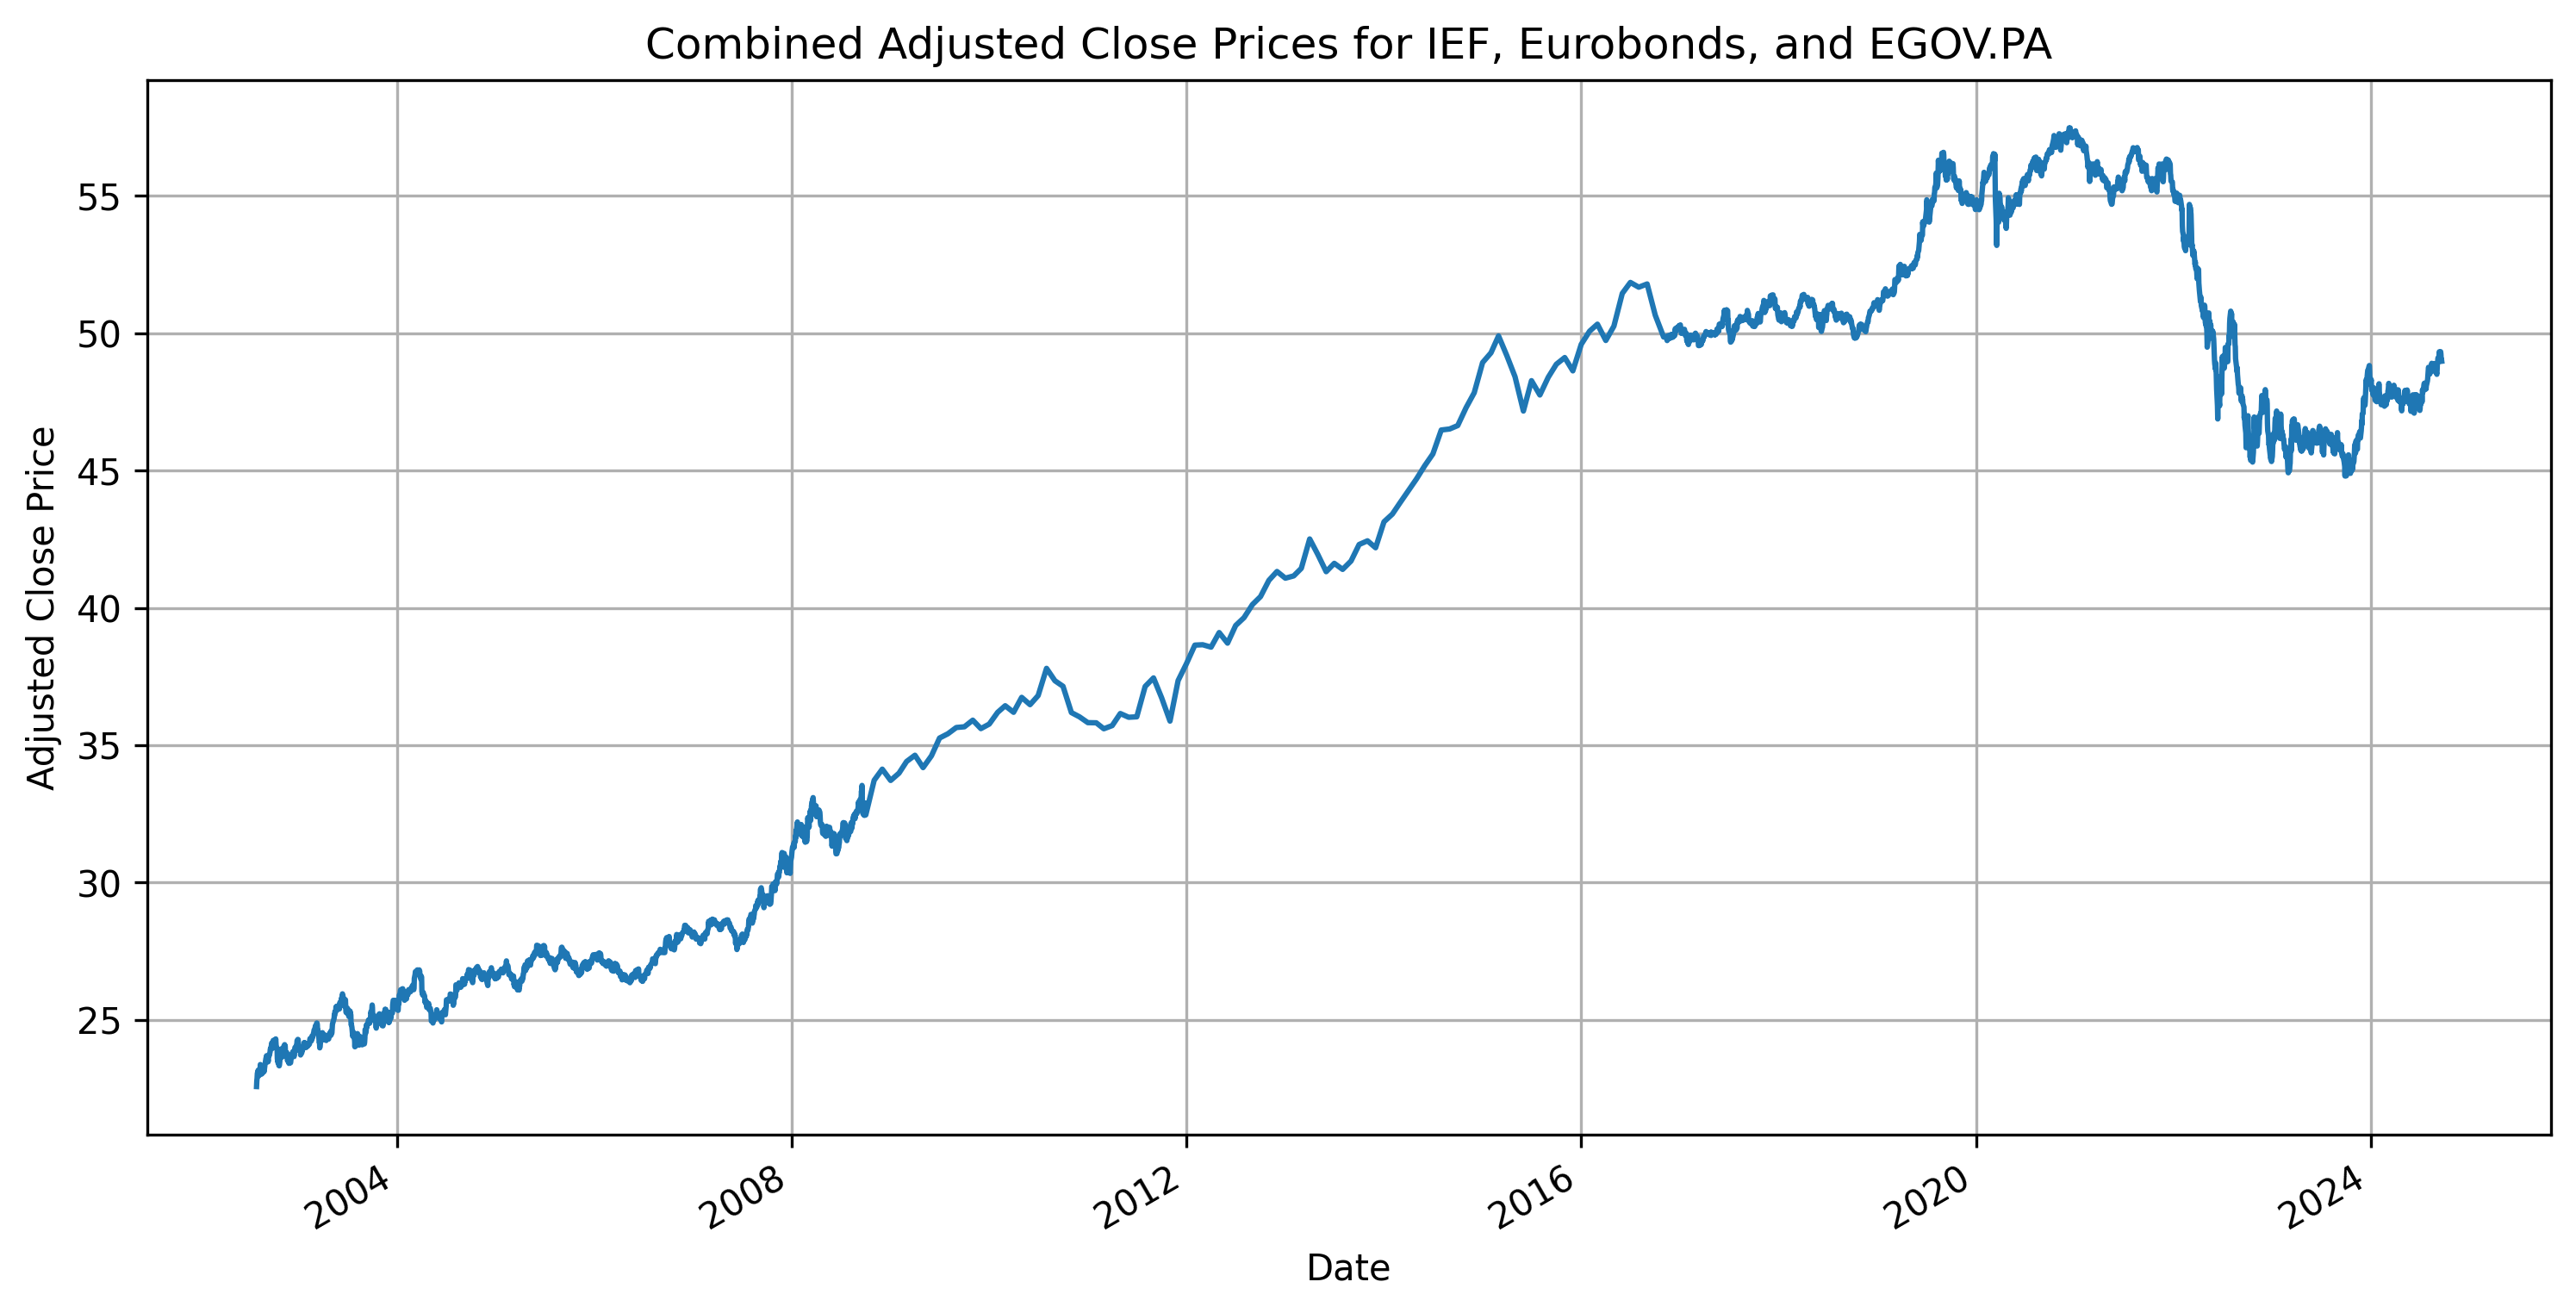

Data successfully concatenated and saved to 'combined_ief_eurobonds_egov.csv'.


In [99]:
# Fetch data for 'IEF' from the earliest date
ief_data = yf.download('IEF', start='1990-01-01')

# Load eurobonds data
eurobonds_data = pd.read_csv('data/cleaned_eurobonds.csv')

# Ensure that the 'Date' column in eurobonds_data is a datetime object
# Adjust the format if your 'Date' column is in a different format
eurobonds_data['Date'] = pd.to_datetime(eurobonds_data['Date'], format='%Y-%m-%d')

# Set 'Date' as the index
eurobonds_data.set_index('Date', inplace=True)

# Fetch data for 'EGOV.PA' from the earliest date
egov_data = yf.download('EGOV.PA', start='1990-01-01')

# Check if data was fetched successfully
if ief_data.empty:
    print("Failed to fetch data for IEF.")
if egov_data.empty:
    print("Failed to fetch data for EGOV.PA.")

# Proceed only if all datasets are not empty
if not ief_data.empty and not eurobonds_data.empty and not egov_data.empty:
    # Step 1: Align IEF data to eurobonds_data
    # Find the first date of eurobonds_data
    first_eurobonds_date = eurobonds_data.index.min()
    # Trim IEF data to dates before eurobonds_data starts
    ief_data_trimmed = ief_data[ief_data.index < first_eurobonds_date].copy()
    
    if ief_data_trimmed.empty:
        print("No IEF data available before eurobonds data starts.")
        combined_data_1 = eurobonds_data.copy()
    else:
        # Scale IEF data to match eurobonds_data
        last_ief_value = ief_data_trimmed['Adj Close'].iloc[-1]
        first_eurobonds_value = eurobonds_data['Bond Value'].iloc[0]
        scaling_factor_ief_to_eurobonds = first_eurobonds_value / last_ief_value
        ief_data_trimmed['Adj Close'] *= scaling_factor_ief_to_eurobonds

        # Extract 'Adj Close' column from IEF data
        ief_adj_close = ief_data_trimmed['Adj Close']

        # Combine IEF and eurobonds data
        combined_data_1 = pd.concat([ief_adj_close, eurobonds_data['Bond Value']])

    # Step 2: Align combined_data_1 to EGOV.PA data
    # Find the first date of EGOV.PA data
    first_egov_date = egov_data.index.min()
    # Trim combined_data_1 to dates before EGOV.PA data starts
    combined_data_1_trimmed = combined_data_1[combined_data_1.index < first_egov_date].copy()

    if combined_data_1_trimmed.empty:
        print("No combined data available before EGOV.PA data starts.")
        combined_data = egov_data['Adj Close'].copy()
    else:
        # Scale combined_data_1 to match EGOV.PA
        last_combined_value = combined_data_1_trimmed.iloc[-1]
        first_egov_value = egov_data['Adj Close'].iloc[0]
        scaling_factor_combined_to_egov = first_egov_value / last_combined_value
        combined_data_1_trimmed *= scaling_factor_combined_to_egov

        # Combine the scaled combined_data_1_trimmed with EGOV.PA data
        eurobonds = pd.concat([combined_data_1_trimmed, egov_data['Adj Close']])

    # Plot the combined data
    plt.figure(figsize=(12, 6), dpi=300)
    eurobonds.plot(title='Combined Adjusted Close Prices for IEF, Eurobonds, and EGOV.PA')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.grid(True)
    plt.show()

    # Optional: Save the combined data to a CSV file
    eurobonds.to_csv('combined_ief_eurobonds_egov.csv', header=['Adjusted Close'])

    print("Data successfully concatenated and saved to 'combined_ief_eurobonds_egov.csv'.")

else:
    print("Data fetch failed for one or more datasets.")

Columns in returns_df: ['SP500', 'MSCI_EM', 'Gold', 'MSCI_Tech', 'BNP_EU_Quality', 'Eurobonds']


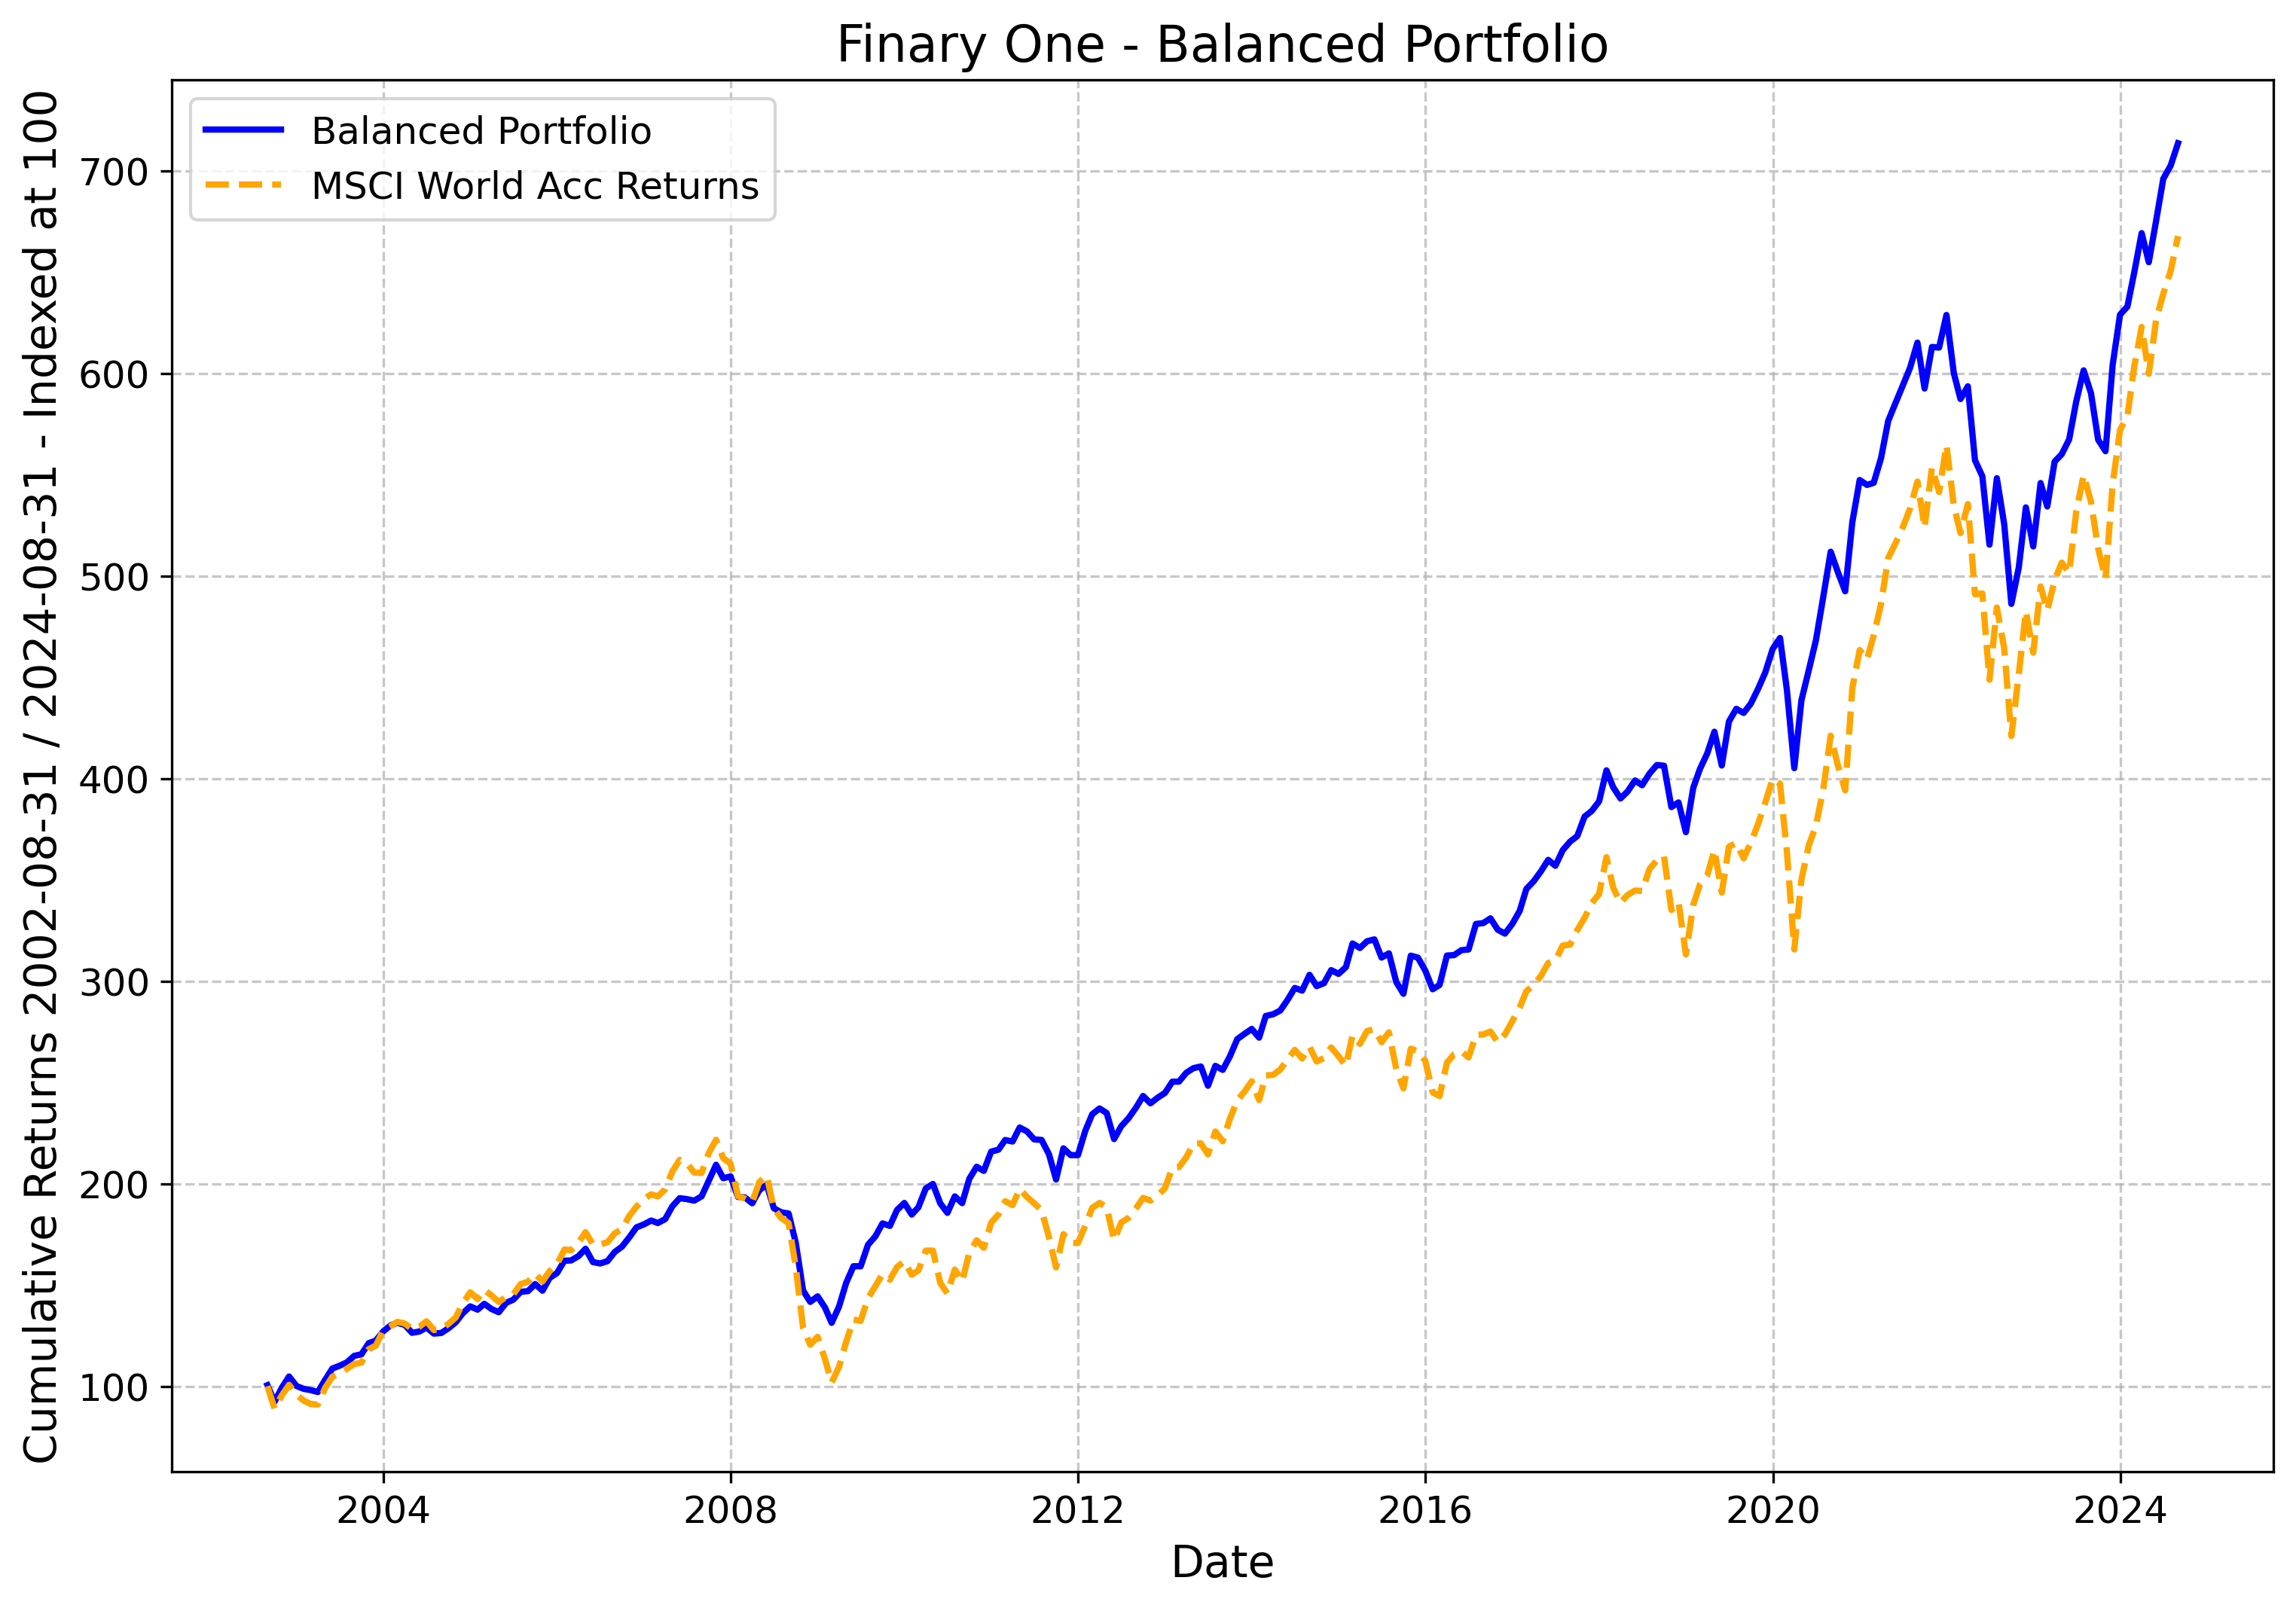

In [100]:
# Step 1: Extract the 'Adj Close' (or appropriate) column and resample to monthly data
sp_monthly = sp_data['Adj Close'].resample('M').last()
em_monthly = em_data['Emerging Markets'].resample('M').last()
gold_monthly = gold_spot['Adjusted Close'].resample('M').last()
msci_tech_monthly = msci_tech_data.resample('M').last()  # Adjusted to use the correct column name
bnp_eu_quality_monthly = bnp_eu_quality.resample('M').last()
eurobonds_monthly = eurobonds.resample('M').last()  # Adjust column name if different

# Step 2: Compute monthly percentage returns and assign a name to each Series
sp_returns = sp_monthly.pct_change().dropna()
sp_returns.name = 'SP500'

em_returns = em_monthly.pct_change().dropna()
em_returns.name = 'MSCI_EM'

gold_returns = gold_monthly.pct_change().dropna()
gold_returns.name = 'Gold'

msci_tech_returns = msci_tech_monthly.pct_change().dropna()
msci_tech_returns.name = 'MSCI_Tech'

bnp_eu_quality_returns = bnp_eu_quality_monthly.pct_change().dropna()
bnp_eu_quality_returns.name = 'BNP_EU_Quality'

eurobonds_returns = eurobonds_monthly.pct_change().dropna()
eurobonds_returns.name = 'Eurobonds'

# Step 3: Combine the returns into a DataFrame
returns_df = pd.concat(
    [
        sp_returns,
        em_returns,
        gold_returns,
        msci_tech_returns,
        bnp_eu_quality_returns,
        eurobonds_returns
    ],
    axis=1
)

# Step 4: Drop rows with NaN values to align the dates
returns_df.dropna(inplace=True)

# Optional: Verify that the DataFrame now has 6 columns
print(f"Columns in returns_df: {returns_df.columns.tolist()}")  # Should list all 6 asset names

# Step 5: Define your portfolio weights
weights = [0.3, 0.1, 0.1, 0.15, 0.15, 0.2]

# Ensure weights sum to 1 (optional if weights are already normalized)
weights = [w / sum(weights) for w in weights]

# Step 6: Compute the portfolio returns
portfolio_returns = returns_df.dot(weights)

# Step 7: Index cumulative returns to 100 instead of 1
cumulative_returns_indexed = 100 * (1 + portfolio_returns).cumprod()

# For the benchmark, assuming you have MSCI World data:
# Resample to monthly data
msci_world_monthly = msci_world_data['MSCI World Net Return'].resample('M').last()

# Compute monthly returns
msci_world_returns = msci_world_monthly.pct_change().dropna()
msci_world_returns.name = 'MSCI_World'

# Align dates with portfolio returns
benchmark_returns = msci_world_returns.reindex(portfolio_returns.index).dropna()

# Compute cumulative returns for the benchmark
msci_world_cumulative_returns_indexed = 100 * (1 + benchmark_returns).cumprod()

# Step 8: Save everything in a variable called aggressive_portfolio
cumulative_returns_indexed.index = pd.to_datetime(cumulative_returns_indexed.index)

aggressive_portfolio = pd.DataFrame({
    'Portfolio_Returns': portfolio_returns,
    'Cumulative_Returns': cumulative_returns_indexed
})

# Step 9: Plot the performance, indexed at 100
plt.figure(figsize=(12, 8), dpi=300)
plt.plot(cumulative_returns_indexed, label='Balanced Portfolio', color='blue', linewidth=2)
plt.plot(msci_world_cumulative_returns_indexed, label='MSCI World Acc Returns', color='orange', linestyle='--', linewidth=2)
plt.title('Finary One - Balanced Portfolio', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns 2002-08-31 / 2024-08-31 - Indexed at 100', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [101]:
global_stats1 = ffn.calc_stats(cumulative_returns_indexed)
global_stats1.set_riskfree_rate(0.0129)
global_stats1.display()

Stats for None from 2002-08-31 00:00:00 - 2024-08-31 00:00:00
Annual risk-free rate considered: 1.29%
Summary:
Total Return    Sharpe    CAGR    Max Drawdown
--------------  --------  ------  --------------
608.98%         -         9.31%   -37.25%

Annualized Returns:
mtd    3m     6m     ytd     1y      3y     5y      10y    incep.
-----  -----  -----  ------  ------  -----  ------  -----  --------
1.57%  5.65%  9.80%  13.46%  20.91%  5.07%  10.53%  8.94%  9.31%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  -        0.75       0.65
mean    -        9.55%      10.29%
vol     -        11.09%     13.95%
skew    -        -0.64      -1.33
kurt    -        1.61       2.34
best    -        8.40%      31.89%
worst   -        -13.89%    -29.05%

Drawdowns:
max      avg       # days
-------  ------  --------
-37.25%  -5.05%       137

Misc:
---------------  ------
avg. up month    2.57%
avg. down month  -2.57%
up year %        81.82%
12m up %       

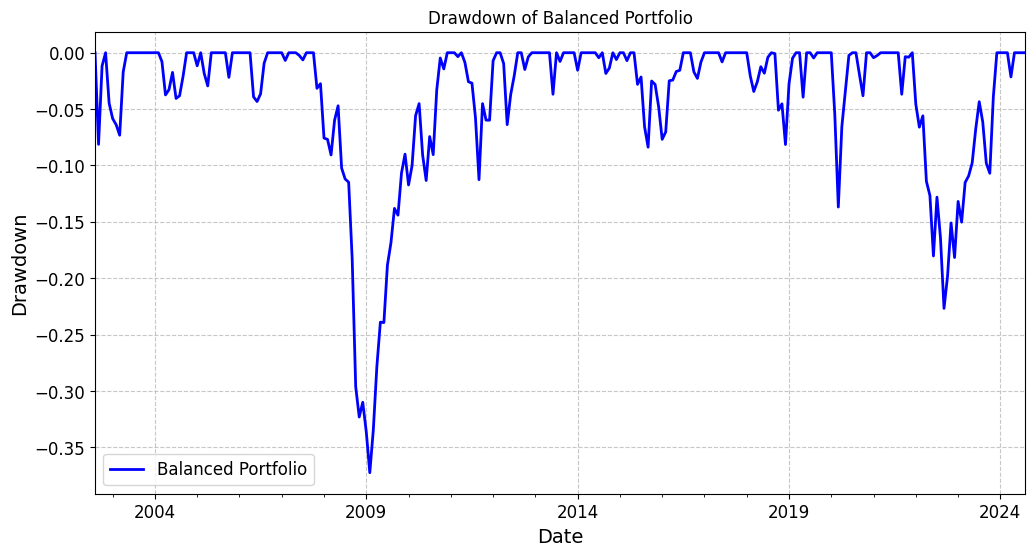

In [102]:
# Plot the drawdown series for the aggressive portfolio
drawdown1 = global_stats1.prices.to_drawdown_series().plot(
    figsize=(12, 6),
    grid=True, 
    title='Drawdown of Balanced Portfolio', 
    color='blue', 
    linewidth=2,
)

# Add labels and legend
plt.xlabel('Date', fontsize=14)
plt.ylabel('Drawdown', fontsize=14)
plt.legend(['Balanced Portfolio'], fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

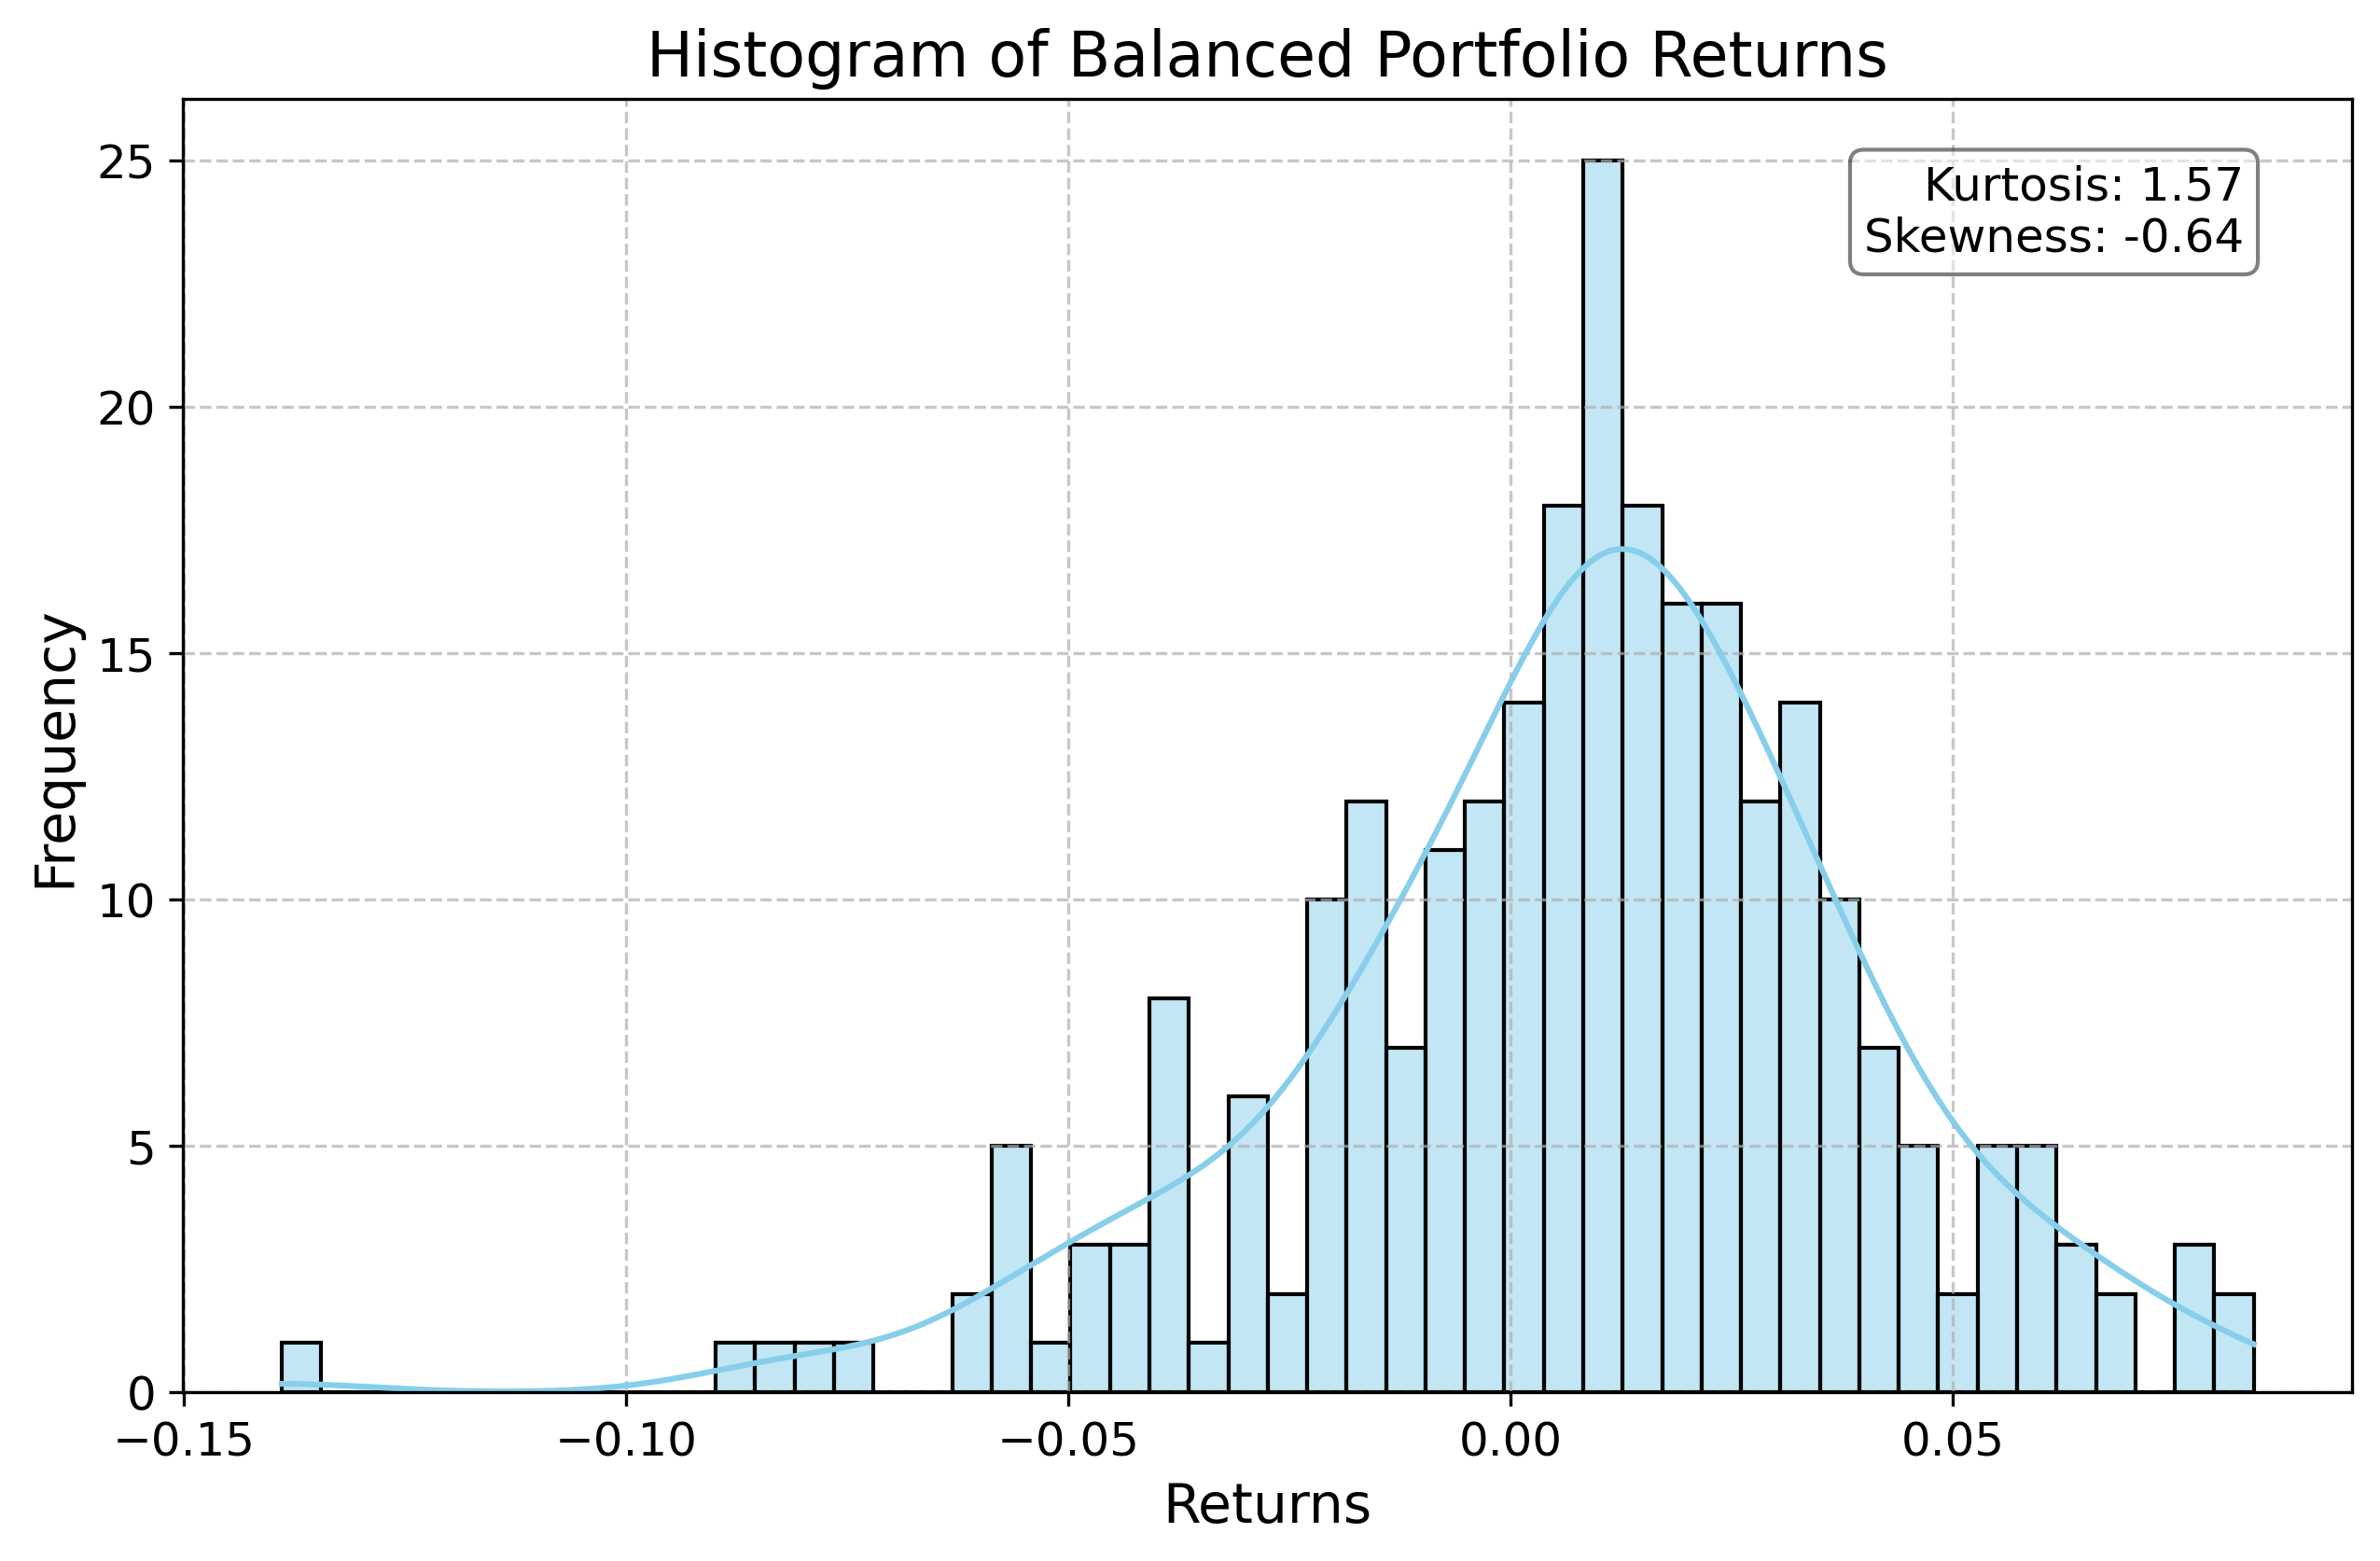

In [103]:
# Plot the histogram
plt.figure(figsize=(10, 6),  dpi=300)
sns.histplot(portfolio_returns, bins=50, kde=True, color='skyblue', edgecolor='black')

# Calculate kurtosis and skewness
kurt = kurtosis(portfolio_returns)
skewness = skew(portfolio_returns)

# Add text box with kurtosis and skewness
textstr = f'Kurtosis: {kurt:.2f}\nSkewness: {skewness:.2f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='right', bbox=props)

# Add labels and title
plt.title('Histogram of Balanced Portfolio Returns', fontsize=16)
plt.xlabel('Returns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

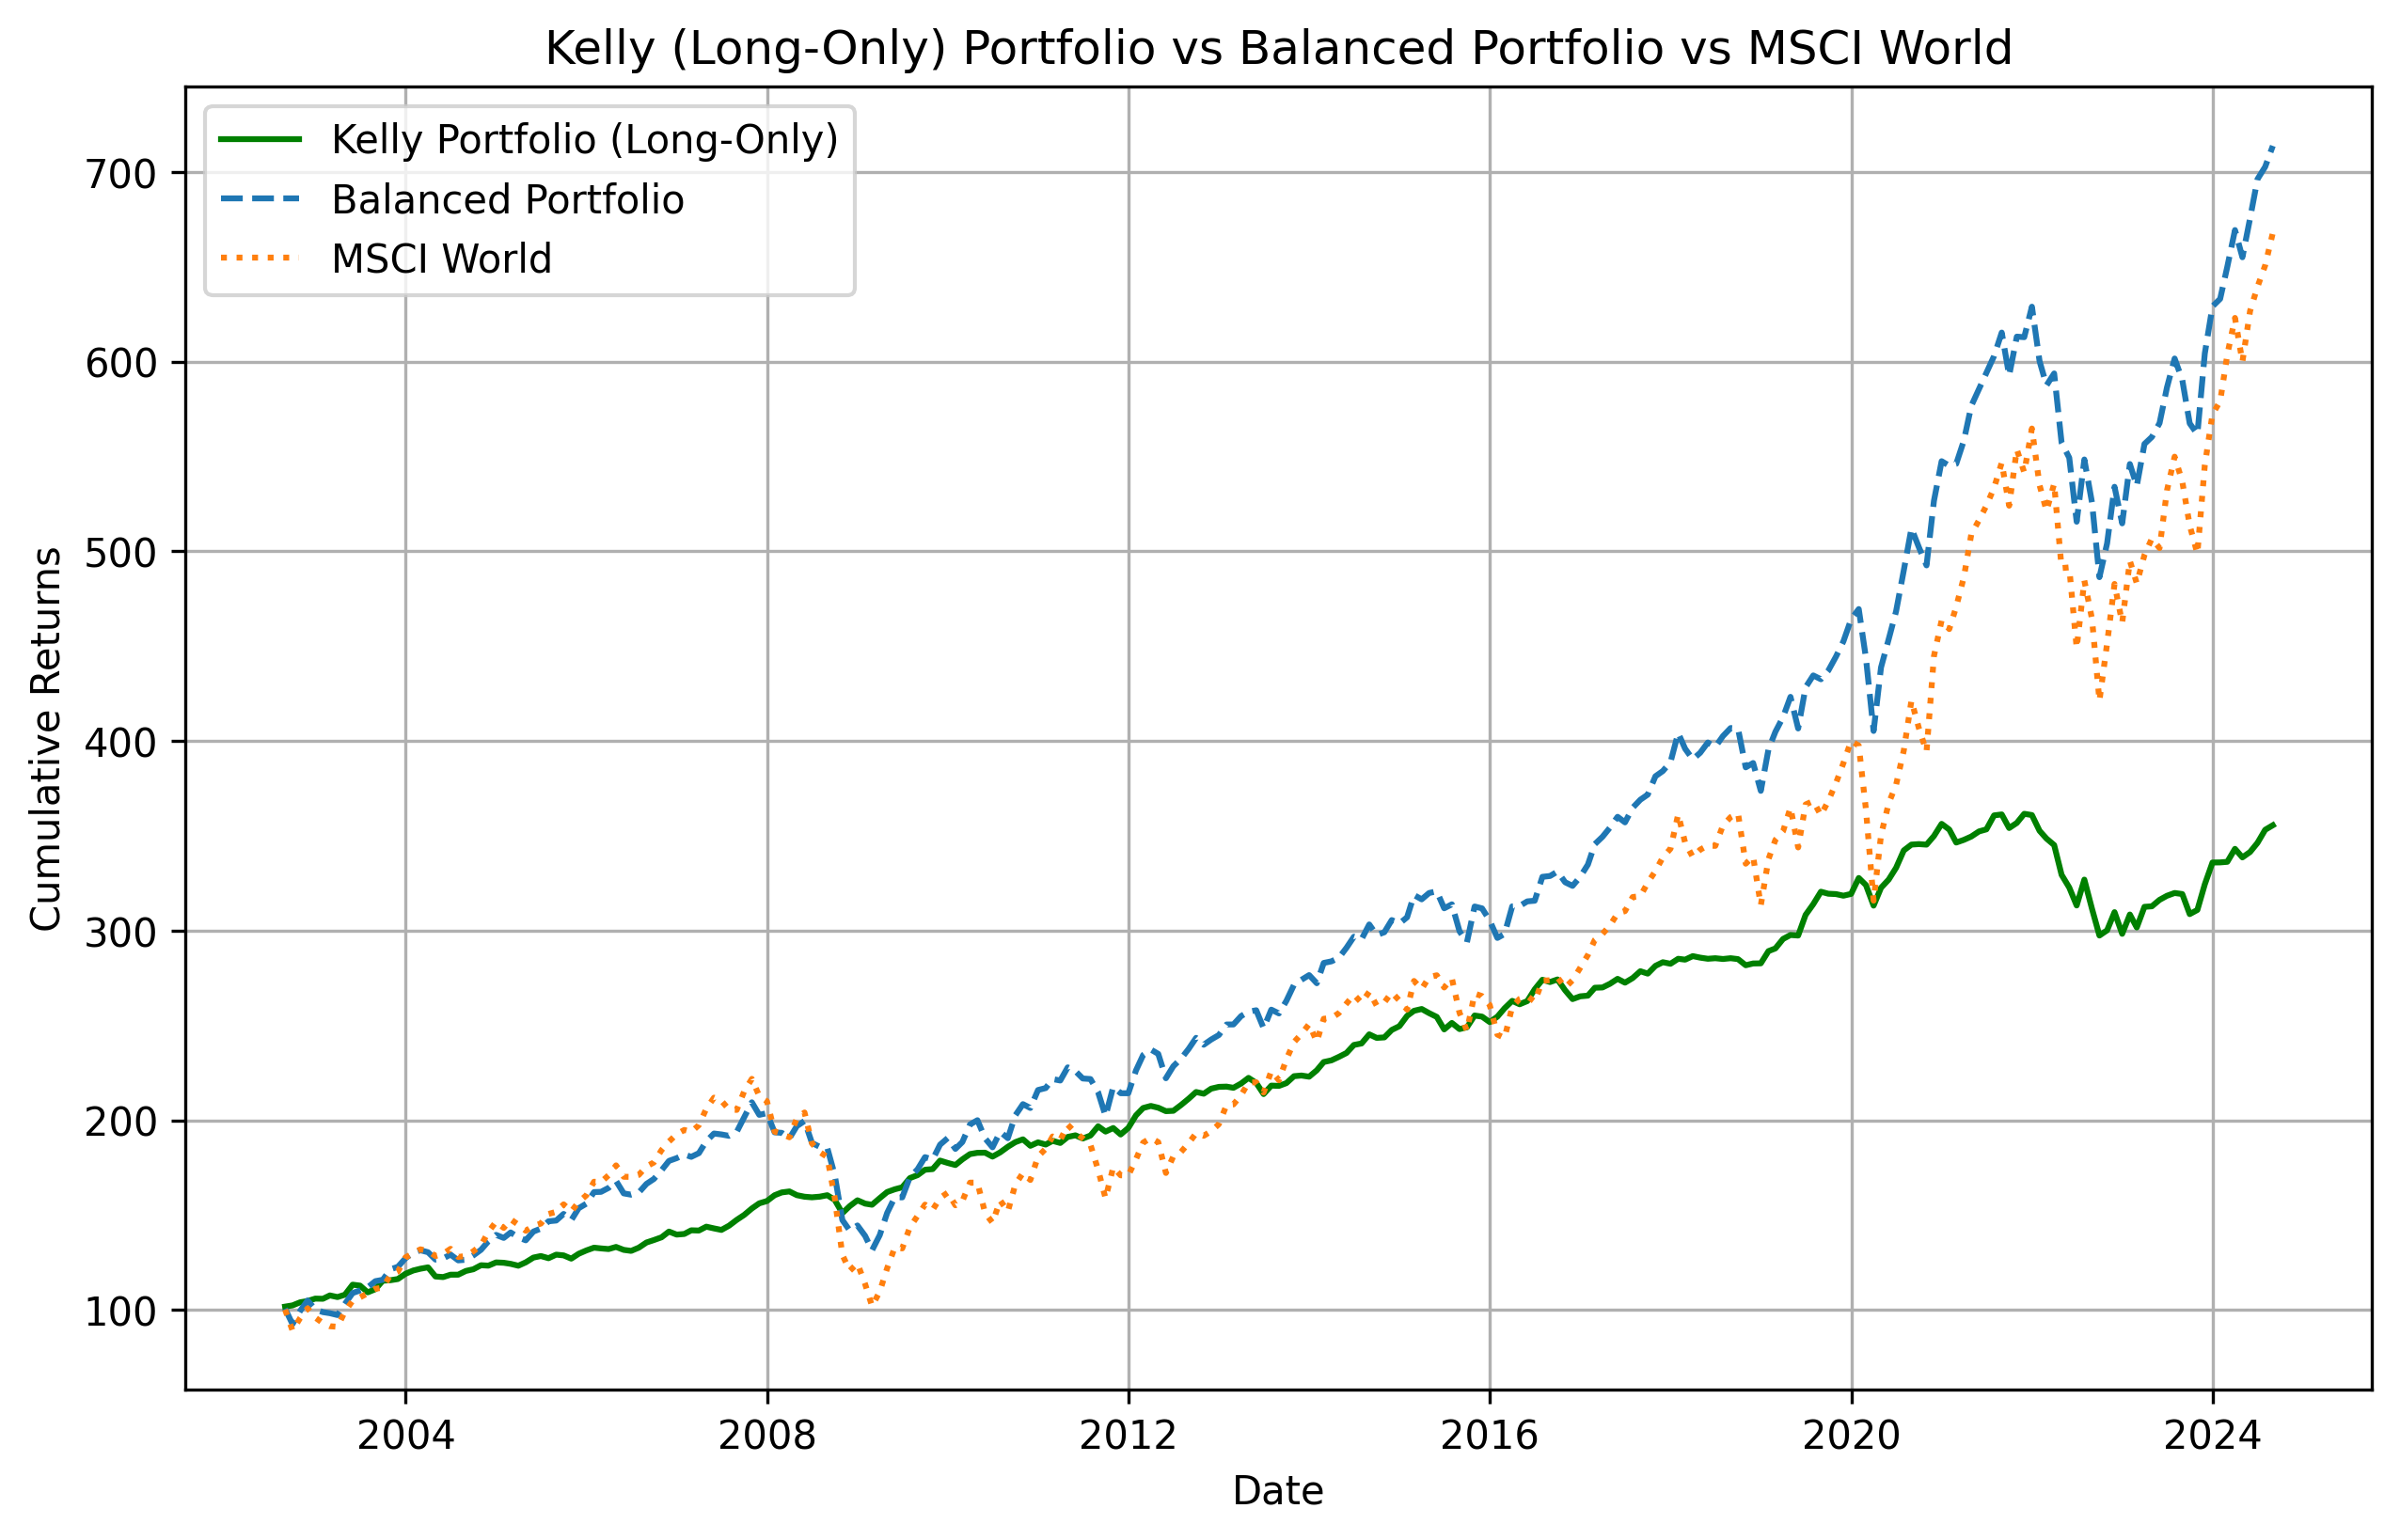

,Asset,Kelly Weights (Long-Only)
0,SP500,6.206384e-02
1,MSCI_EM,2.596959e-13
2,Gold,1.063094e-01
3,MSCI_Tech,9.270814e-02
4,BNP_EU_Quality,8.383425e-03
5,Eurobonds,7.305352e-01


In [104]:
from scipy.optimize import minimize

expected_returns = returns_df.mean()  # Use the mean returns of individual assets
cov_matrix = returns_df.cov()  # Covariance matrix of the asset returns

# Step 1: Define the objective function (negative Kelly's criterion to minimize)
def kelly_criterion(weights, expected_returns, cov_matrix):
    # Negative of Kelly formula (since we are minimizing)
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return -portfolio_return / portfolio_variance

# Step 2: Define constraints and bounds (no shorting or leverage)
num_assets = len(expected_returns)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # Weights sum to 1
bounds = tuple((0, 1) for _ in range(num_assets))  # No shorting, weights between 0 and 1

# Step 3: Initial guess for weights (equal weight allocation)
initial_weights = num_assets * [1. / num_assets]

# Step 4: Optimize using scipy's minimize function
result = minimize(kelly_criterion, initial_weights, args=(expected_returns, cov_matrix),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Step 5: Get the optimized Kelly weights
kelly_weights_long_only = result.x

# Step 6: Compute the Kelly portfolio returns using the optimized weights
kelly_portfolio_returns_long_only = returns_df.dot(kelly_weights_long_only)

# Step 7: Compute cumulative returns for the long-only Kelly portfolio
kelly_cumulative_returns_long_only = (1 + kelly_portfolio_returns_long_only).cumprod() * 100

# Step 8: Plot the performance of the long-only Kelly portfolio and compare it with the aggressive portfolio and MSCI World
plt.figure(figsize=(10, 6), dpi=300)

# Plot long-only Kelly portfolio cumulative returns
plt.plot(kelly_cumulative_returns_long_only, label='Kelly Portfolio (Long-Only)', color='green')

# Plot aggressive portfolio cumulative returns
plt.plot(cumulative_returns_indexed, label='Balanced Portfolio', linestyle='--')

# Plot MSCI World cumulative returns
plt.plot(msci_world_cumulative_returns_indexed, label='MSCI World', linestyle=':')

plt.title('Kelly (Long-Only) Portfolio vs Balanced Portfolio vs MSCI World')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Display the optimized Kelly weights for each asset
kelly_weights_long_only_df = pd.DataFrame({
    'Asset': returns_df.columns,
    'Kelly Weights (Long-Only)': kelly_weights_long_only
})
kelly_weights_long_only_df

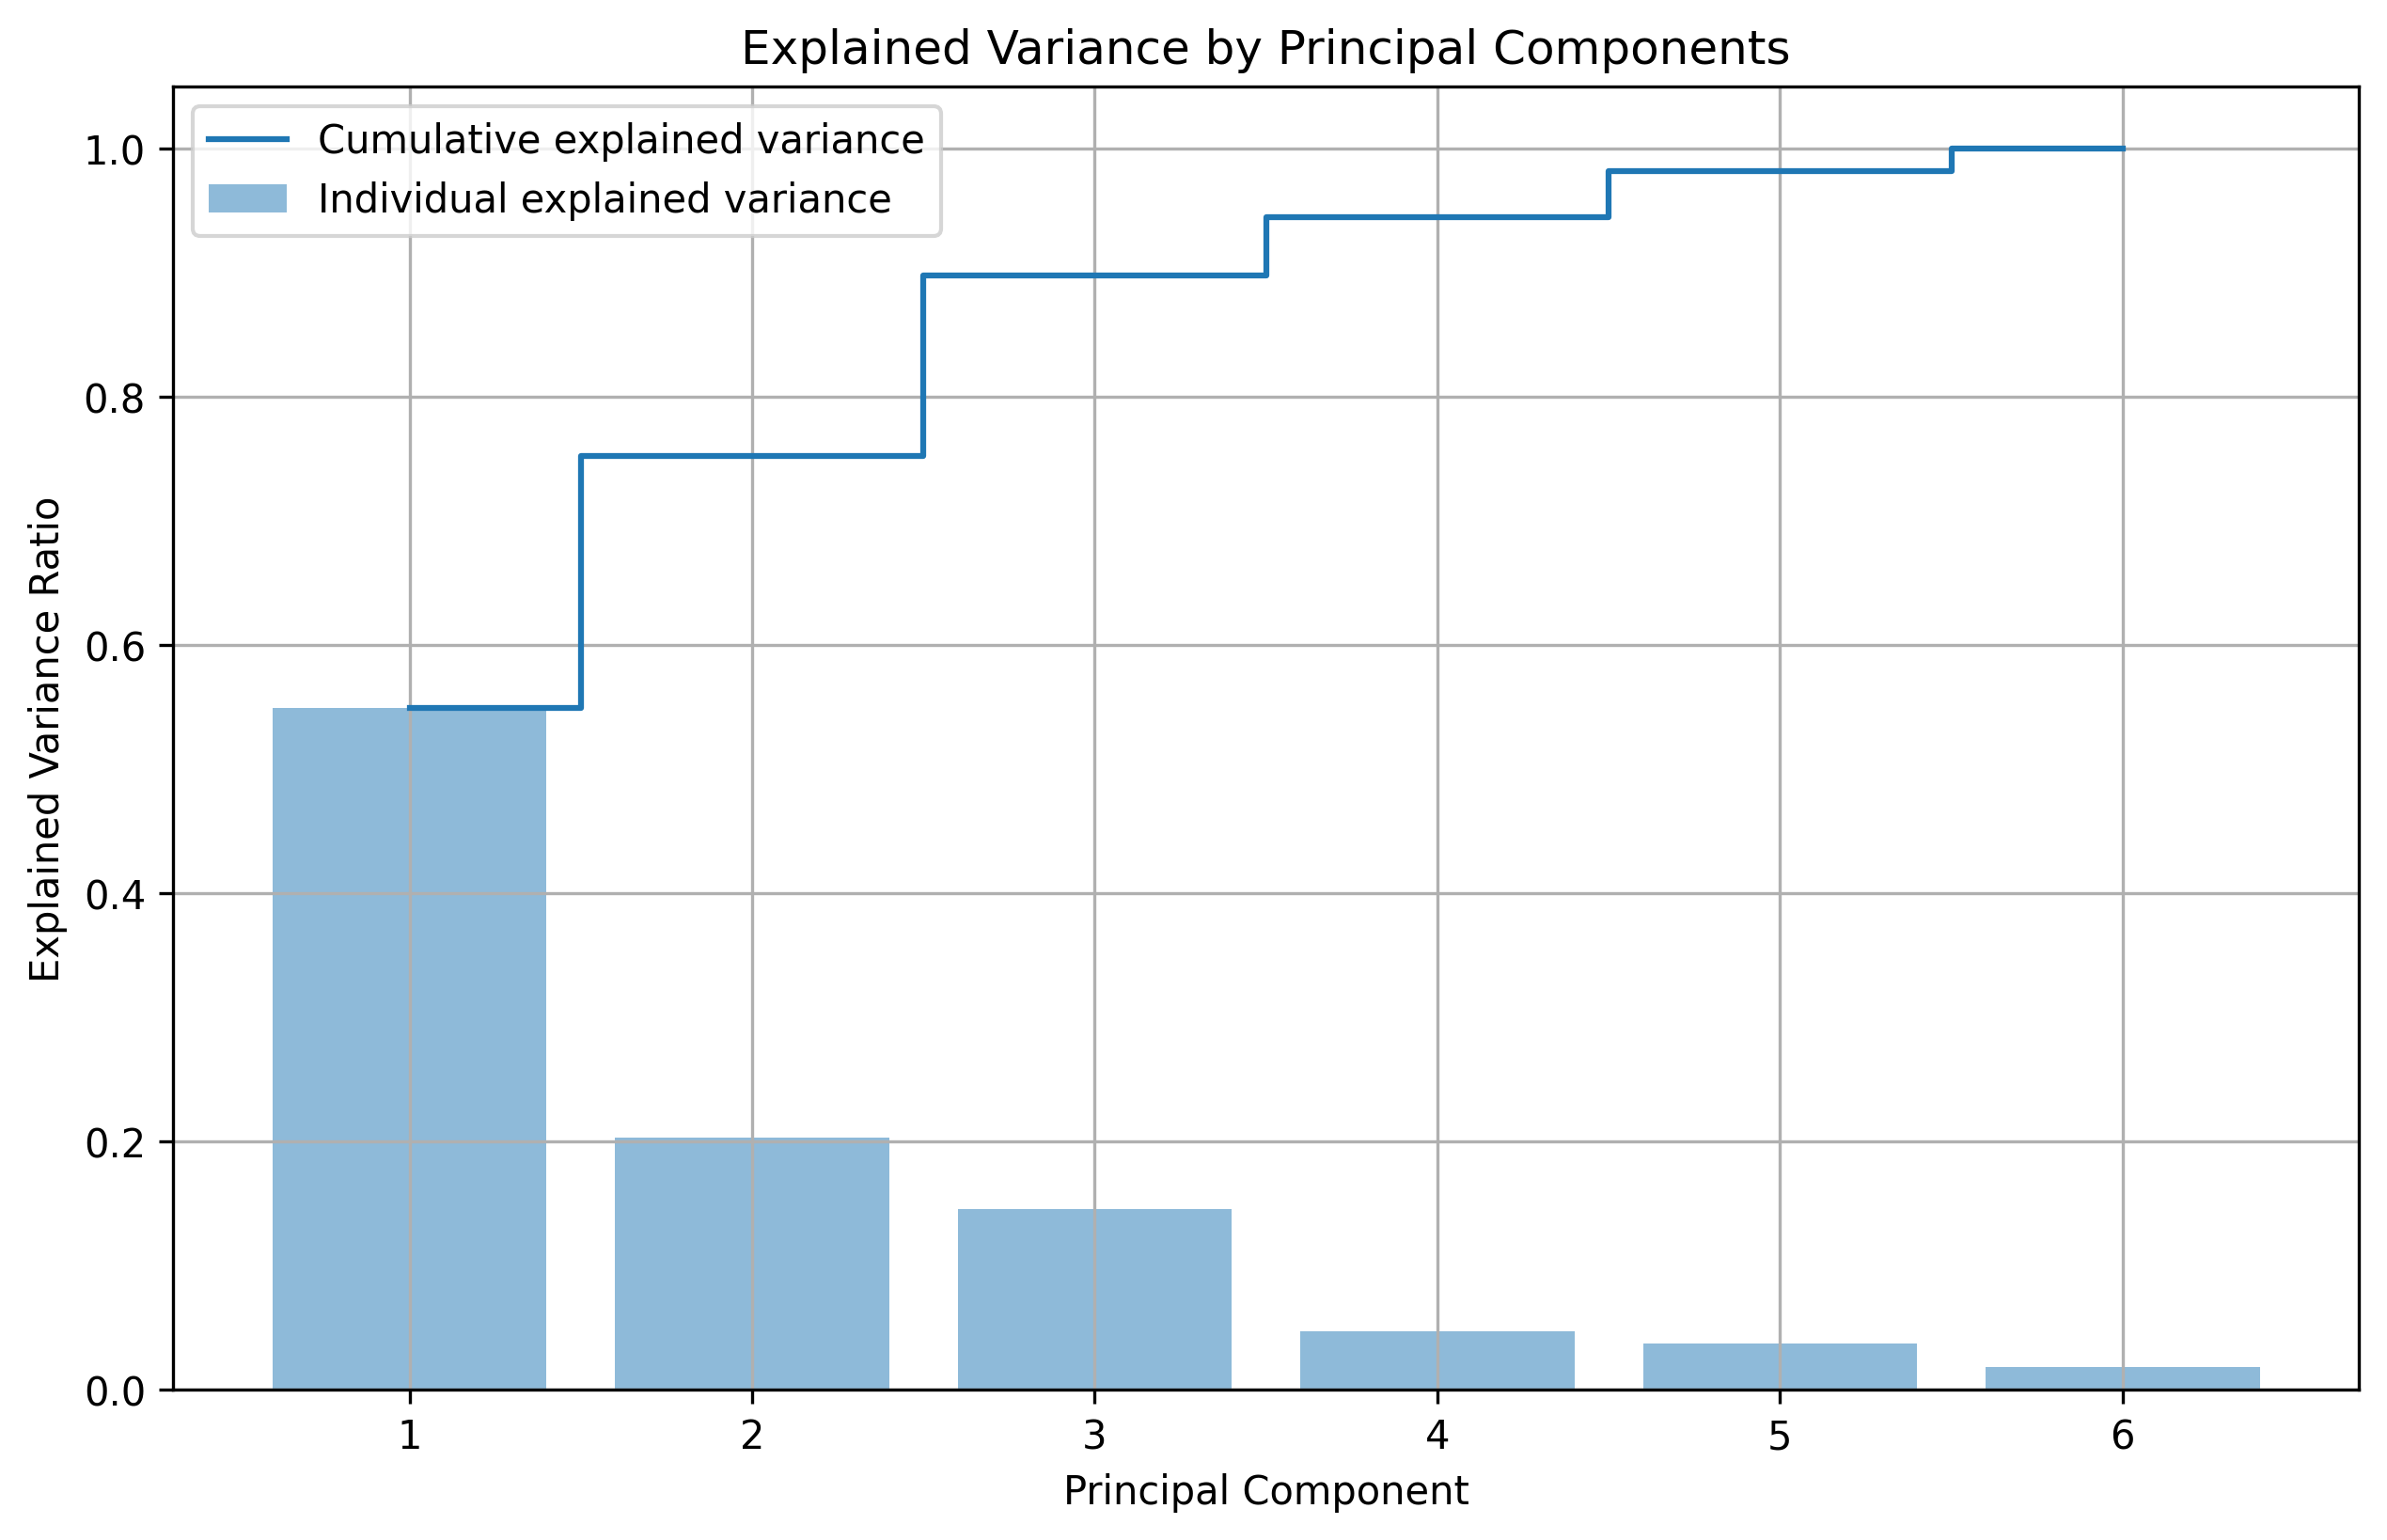

,SP500,MSCI_EM,Gold,MSCI_Tech,BNP_EU_Quality,Eurobonds
PC1,0.524190,0.472055,0.074657,0.501736,0.495051,-0.000723
PC2,-0.033007,0.176574,0.745025,-0.111673,-0.131693,0.618754
PC3,0.086191,-0.222086,-0.557532,0.069994,0.134786,0.780603
PC4,-0.230963,0.719619,-0.278311,-0.564626,0.172664,0.052273
PC5,-0.043429,-0.412902,0.224495,-0.381808,0.792734,-0.054982
PC6,0.813312,-0.091235,-0.025844,-0.516054,-0.247333,-0.045239


In [105]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns_df)

# Step 2: Perform PCA
pca = PCA()
pca.fit(returns_scaled)

# Step 3: Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Step 4: Plot the explained variance
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Step 5: Display the PCA components (principal axes in feature space)
pca_components = pd.DataFrame(pca.components_, columns=returns_df.columns, index=[f'PC{i+1}' for i in range(len(returns_df.columns))])
pca_components

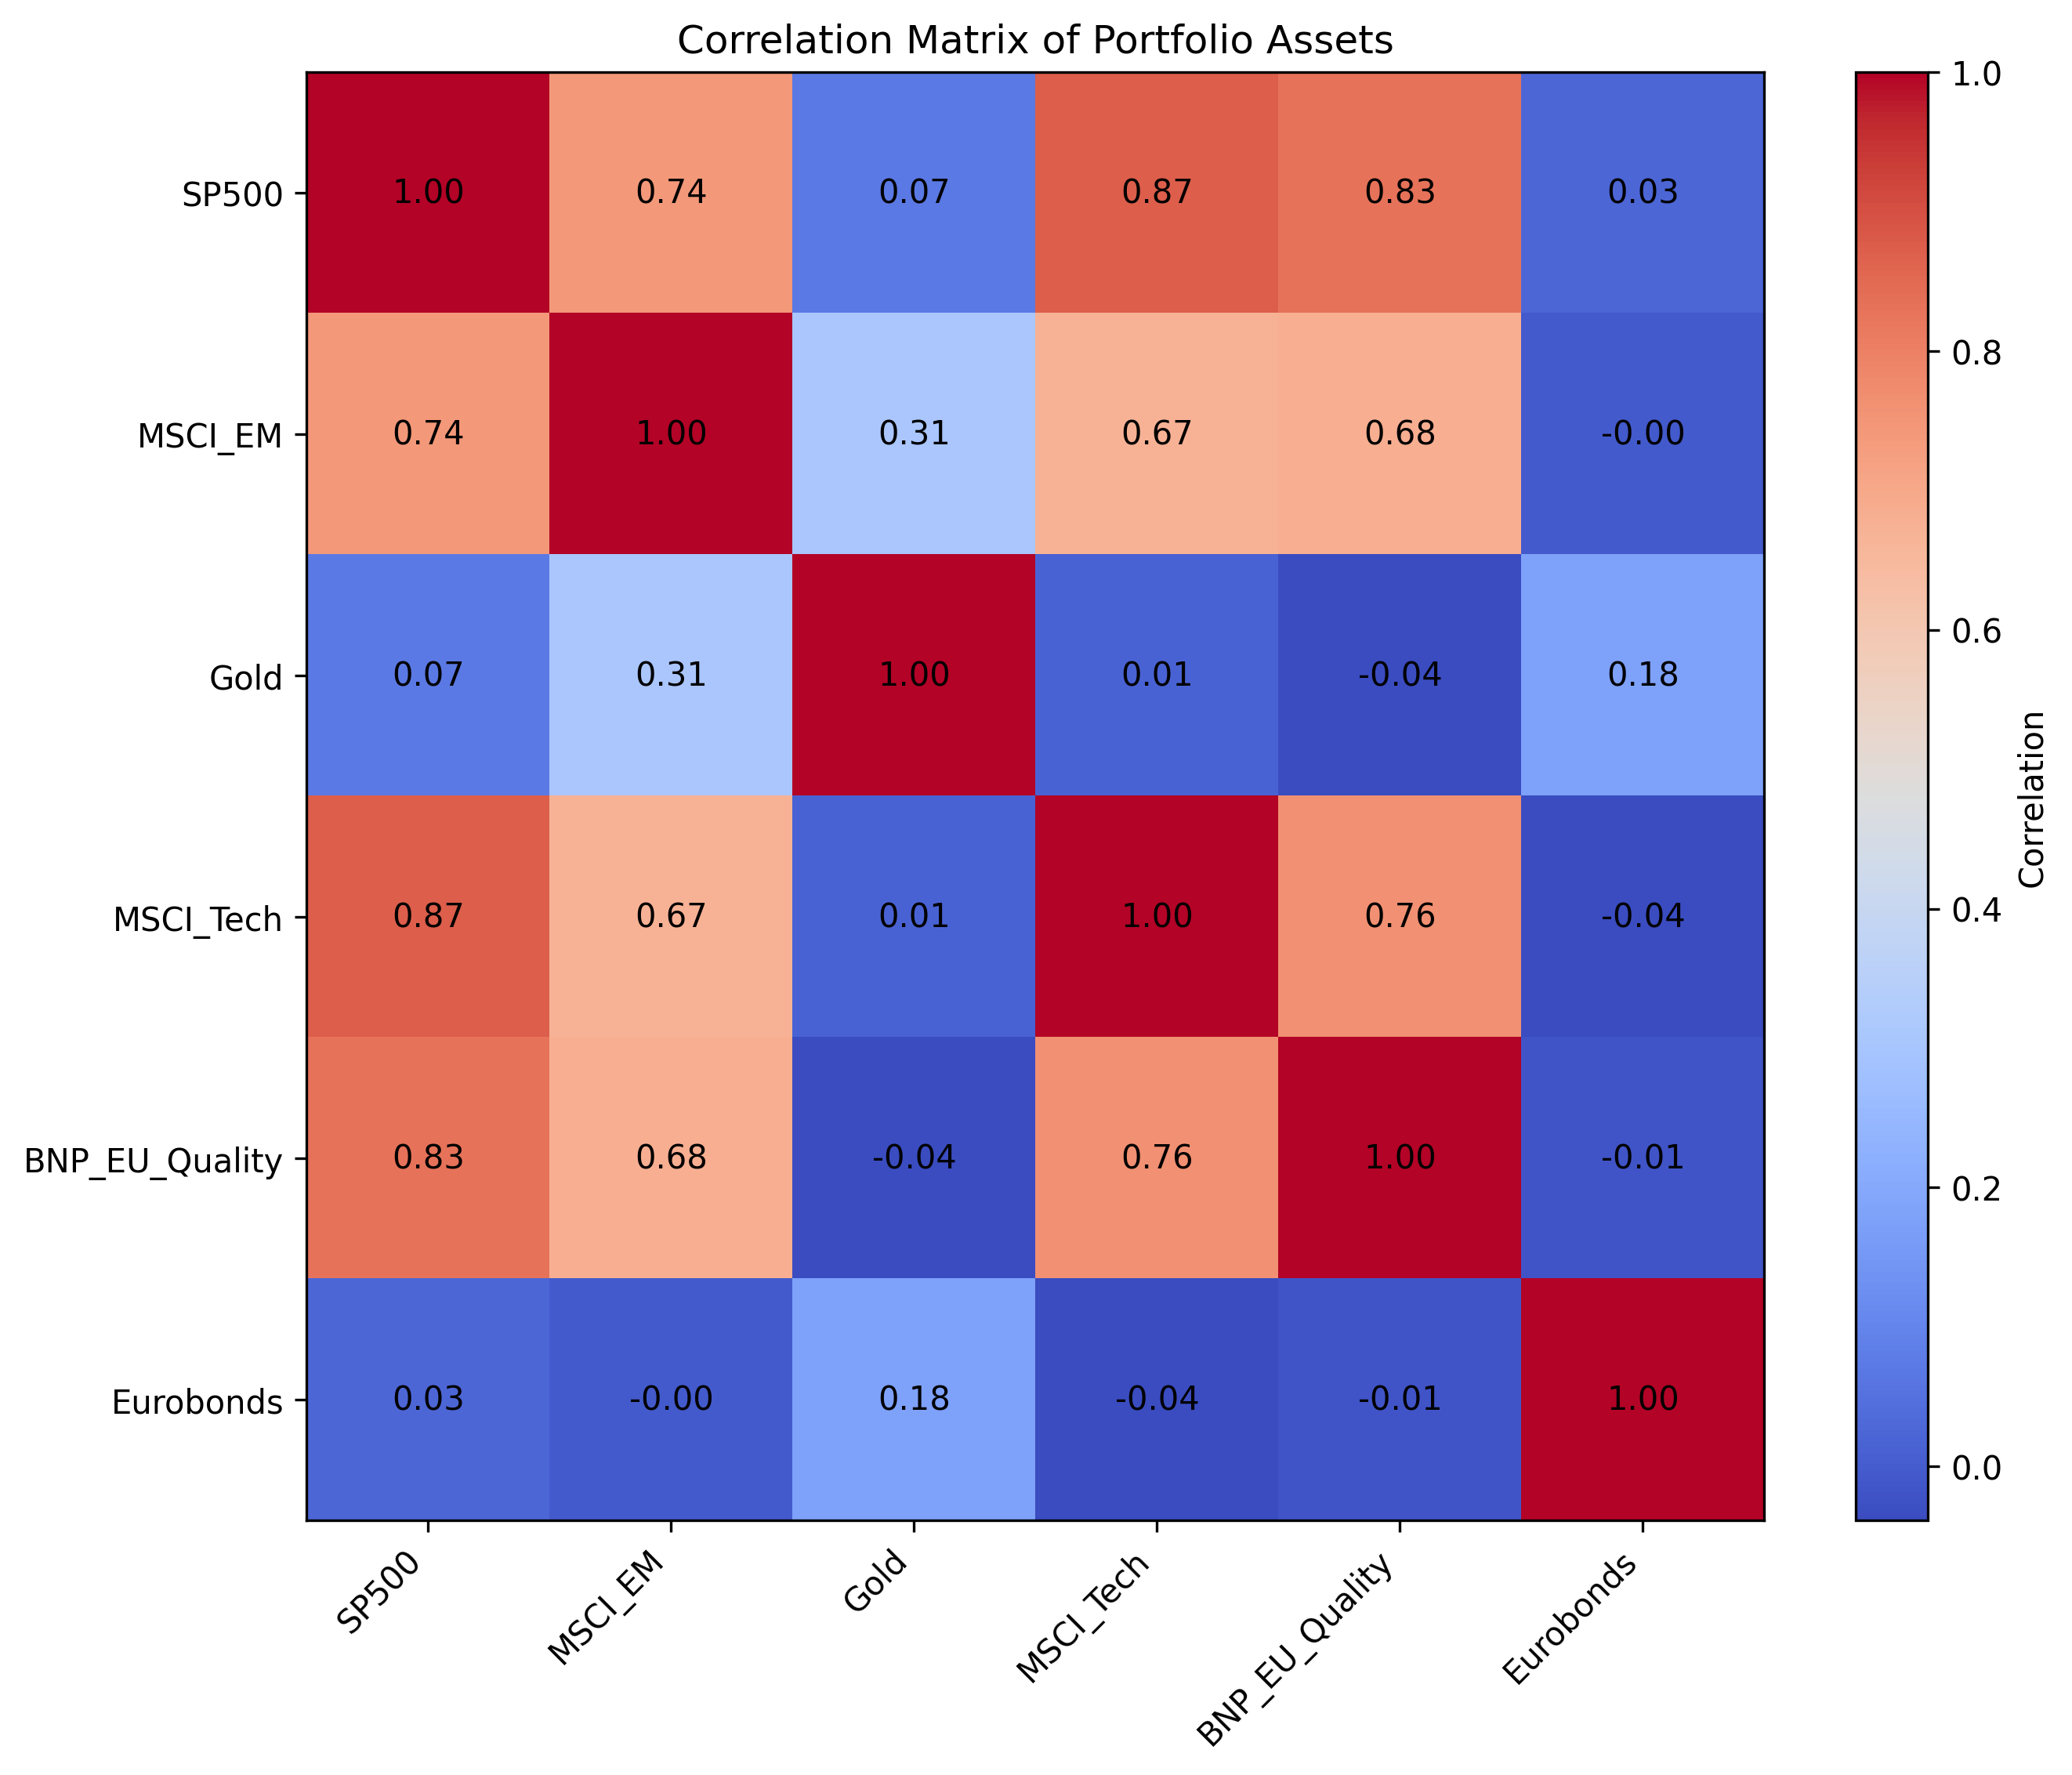

,SP500,MSCI_EM,Gold,MSCI_Tech,BNP_EU_Quality,Eurobonds
SP500,1.000000,0.740898,0.070707,0.871604,0.829992,0.025607
MSCI_EM,0.740898,1.000000,0.307847,0.668898,0.679874,-0.002676
Gold,0.070707,0.307847,1.000000,0.014342,-0.036534,0.176753
MSCI_Tech,0.871604,0.668898,0.014342,1.000000,0.763406,-0.039051
BNP_EU_Quality,0.829992,0.679874,-0.036534,0.763406,1.000000,-0.014993
Eurobonds,0.025607,-0.002676,0.176753,-0.039051,-0.014993,1.000000


In [106]:
# Step 1: Compute the correlation matrix of the portfolio assets
correlation_matrix = returns_df.corr()

# Step 2: Plot the correlation matrix as a heatmap with numbers
plt.figure(figsize=(10, 8), dpi=300)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar(label='Correlation')

# Add the correlation numbers on the heatmap
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# Set x and y axis labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Portfolio Assets')
plt.grid(False)
plt.show()

# Step 3: Optionally, display the correlation matrix as a DataFrame
correlation_matrix

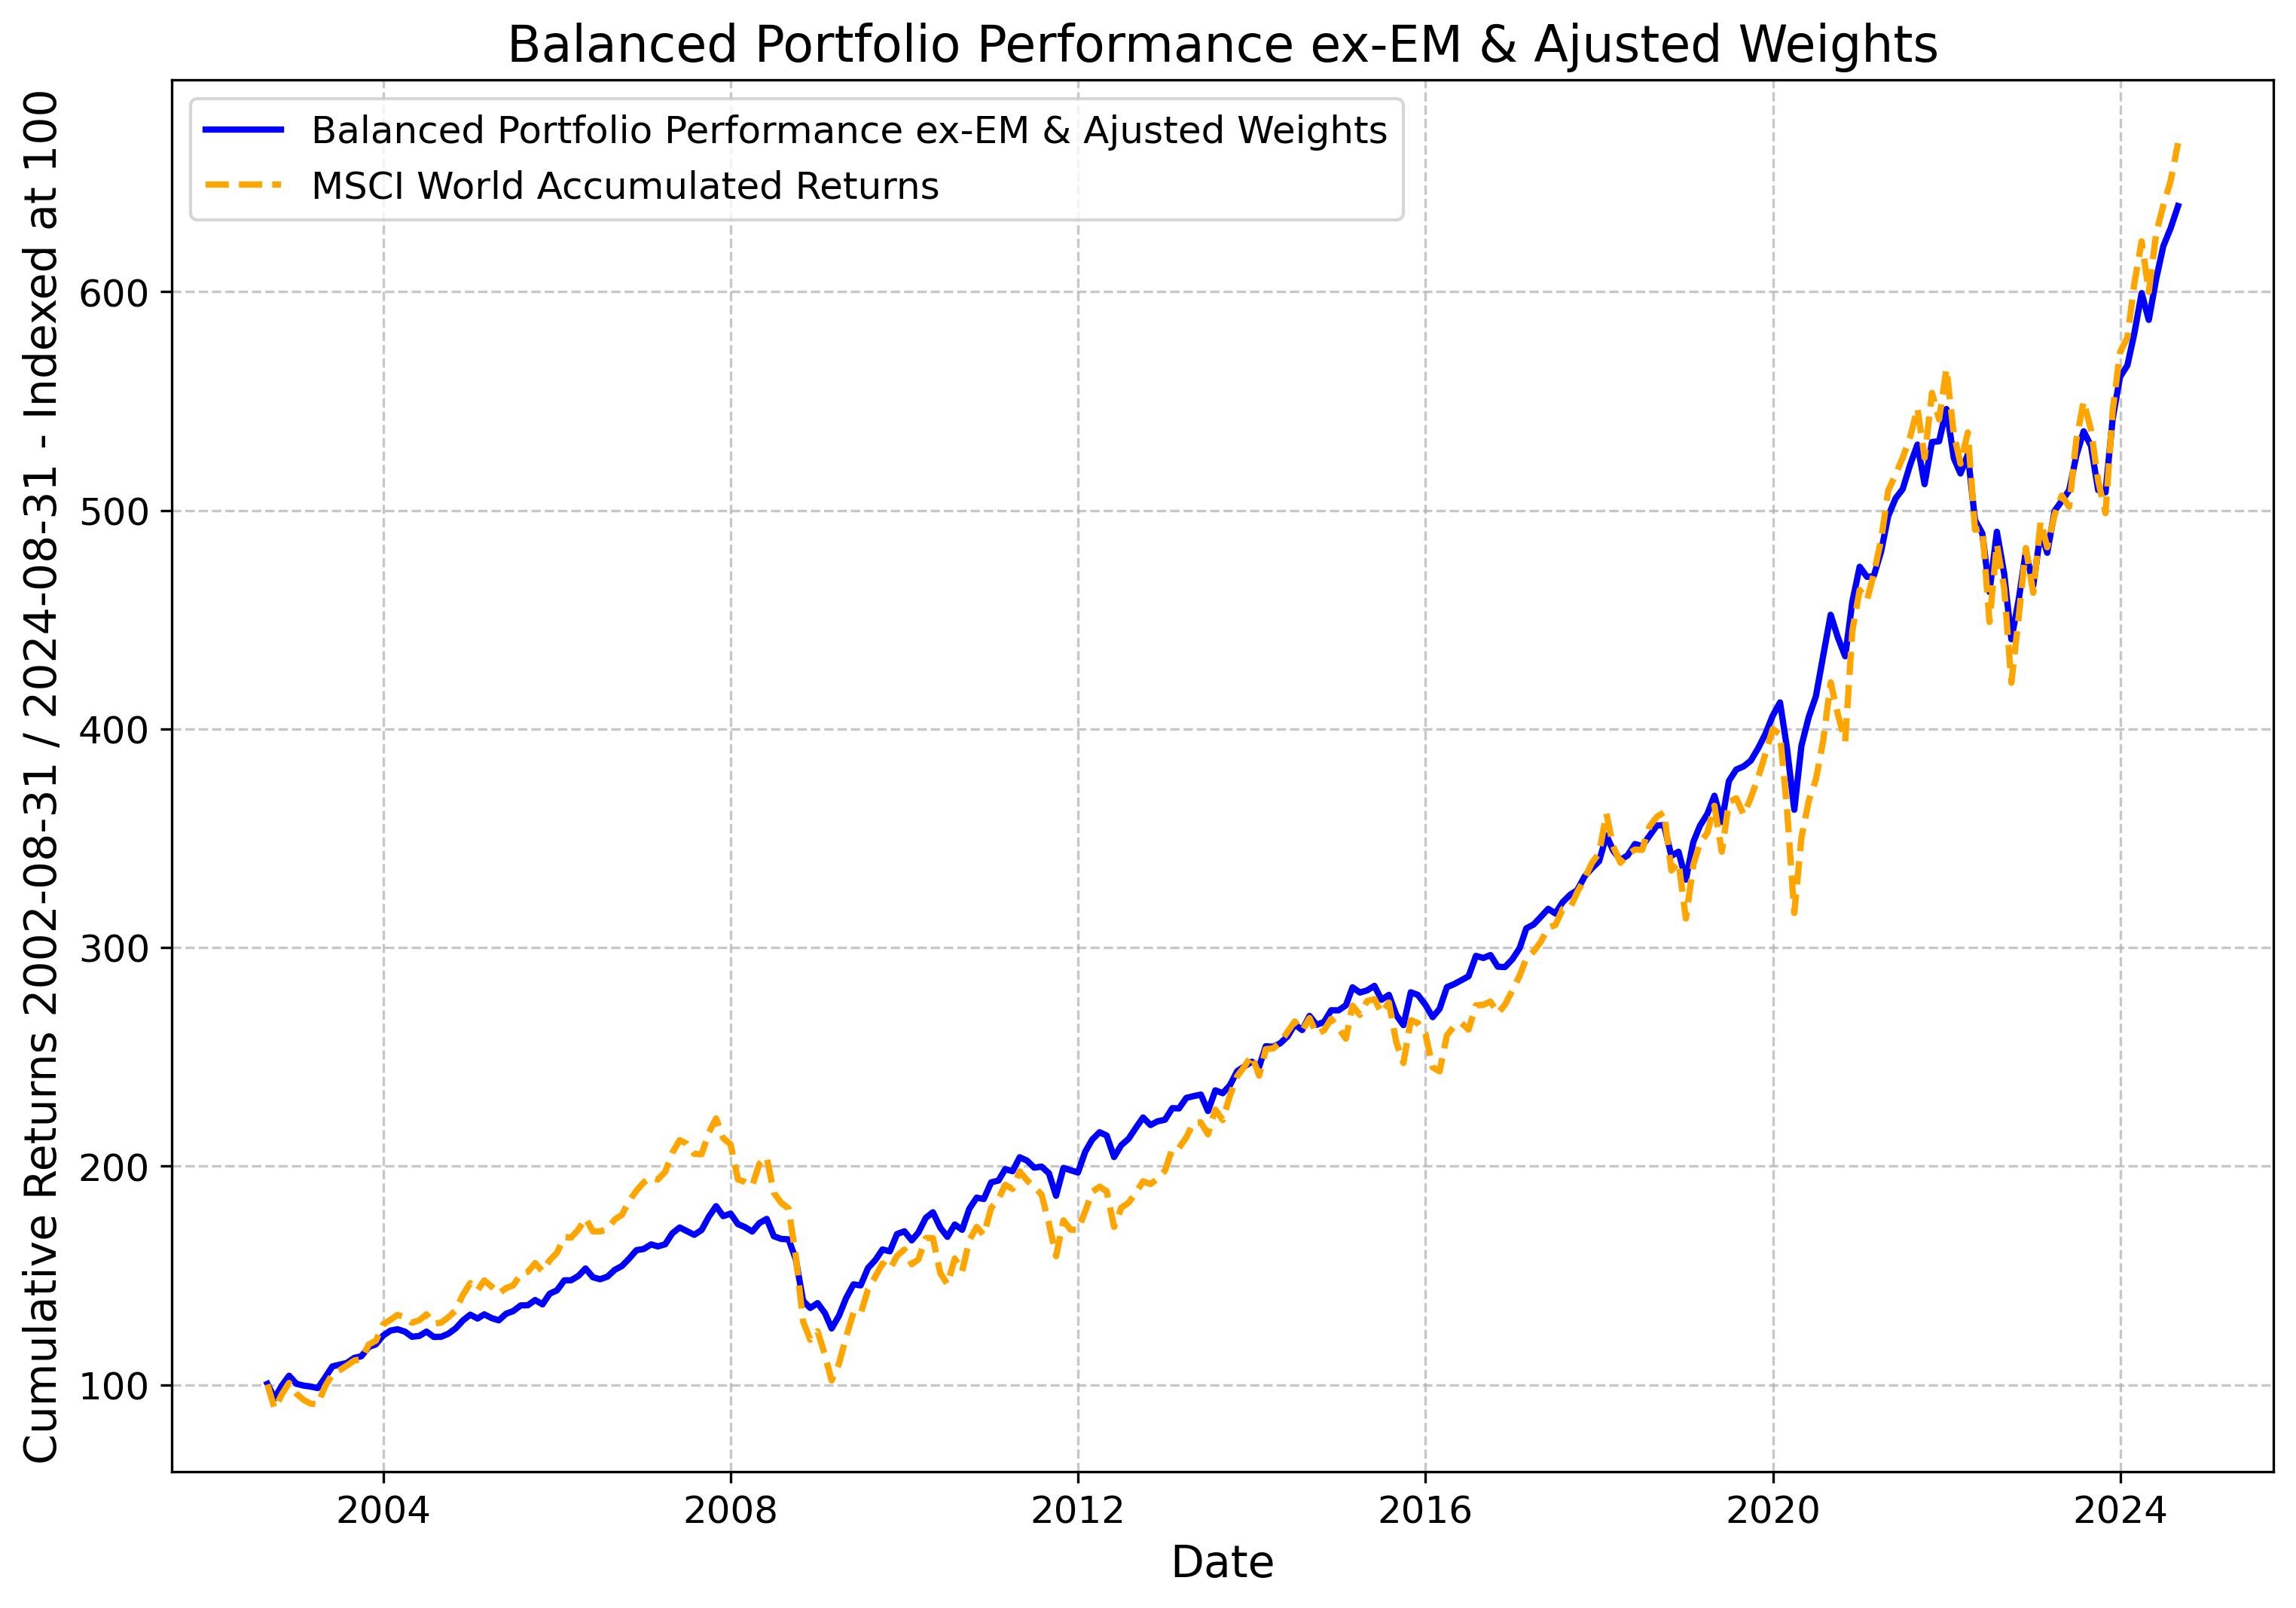

In [107]:
# Weights order :
# (1) sp_data for SP500
# (2) em_data for MSCI EM
# (3) gold_spot for Gold prices
# (4) msci_tech_data for MSCI Technology
# (5) bnp_eu_quality for BNP ESG EU Quality
# (6) eurobonds for Euro Bonds

# Step 5: Define your portfolio weights
weights2 = [0.40, 0, 0.15, 0.1, 0.1, 0.15]

# Ensure weights sum to 1 (optional if weights are already normalized)
weights = [w / sum(weights2) for w in weights2]

# Step 6: Compute the portfolio returns
portfolio_returns2 = returns_df.dot(weights2)

# Step 7: Index cumulative returns to 100 instead of 1
cumulative_returns_indexed2 = 100 * (1 + portfolio_returns2).cumprod()

# Step 8: Save everything in a variable called aggressive_portfolio
cumulative_returns_indexed2.index = pd.to_datetime(cumulative_returns_indexed2.index)

aggressive_portfolio2 = pd.DataFrame({
    'Portfolio_Returns': portfolio_returns,
    'Cumulative_Returns': cumulative_returns_indexed2
})

# Step 9: Plot the performance, indexed at 100
plt.figure(figsize=(12, 8), dpi=300)
plt.plot(cumulative_returns_indexed2, label='Balanced Portfolio Performance ex-EM & Ajusted Weights', color='blue', linewidth=2)
plt.plot(msci_world_cumulative_returns_indexed, label='MSCI World Accumulated Returns', color='orange', linestyle='--', linewidth=2)
plt.title('Balanced Portfolio Performance ex-EM & Ajusted Weights', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns 2002-08-31 / 2024-08-31 - Indexed at 100', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [108]:
global_stats2 = ffn.calc_stats(cumulative_returns_indexed2)
global_stats2.set_riskfree_rate(0.0129)
global_stats2.display()

Stats for None from 2002-08-31 00:00:00 - 2024-08-31 00:00:00
Annual risk-free rate considered: 1.29%
Summary:
Total Return    Sharpe    CAGR    Max Drawdown
--------------  --------  ------  --------------
536.38%         -         8.78%   -30.80%

Annualized Returns:
mtd    3m     6m      ytd     1y      3y     5y      10y    incep.
-----  -----  ------  ------  ------  -----  ------  -----  --------
1.61%  5.52%  10.06%  13.93%  20.73%  6.44%  10.79%  9.05%  8.78%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  -        0.80       0.71
mean    -        8.90%      9.41%
vol     -        9.53%      11.46%
skew    -        -0.62      -1.43
kurt    -        1.67       2.37
best    -        8.05%      23.92%
worst   -        -12.15%    -22.96%

Drawdowns:
max      avg       # days
-------  ------  --------
-30.80%  -3.82%    120.21

Misc:
---------------  ------
avg. up month    2.26%
avg. down month  -2.15%
up year %        86.36%
12m up %     

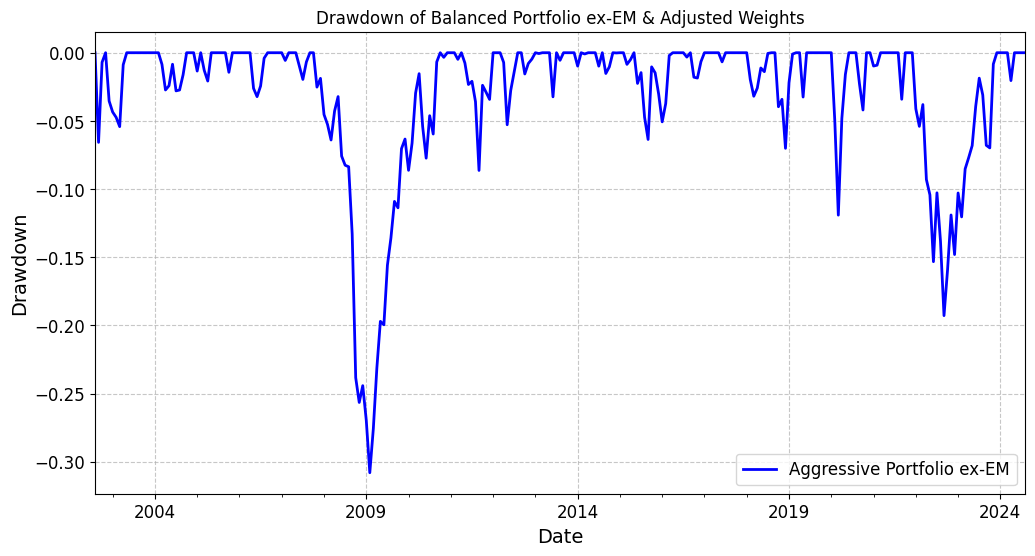

In [109]:
# Plot the drawdown series for the aggressive portfolio
drawdown2 = global_stats2.prices.to_drawdown_series().plot(
    figsize=(12, 6),
    grid=True, 
    title='Drawdown of Balanced Portfolio ex-EM & Adjusted Weights', 
    color='blue', 
    linewidth=2,
)

# Add labels and legend
plt.xlabel('Date', fontsize=14)
plt.ylabel('Drawdown', fontsize=14)
plt.legend(['Aggressive Portfolio ex-EM'], fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

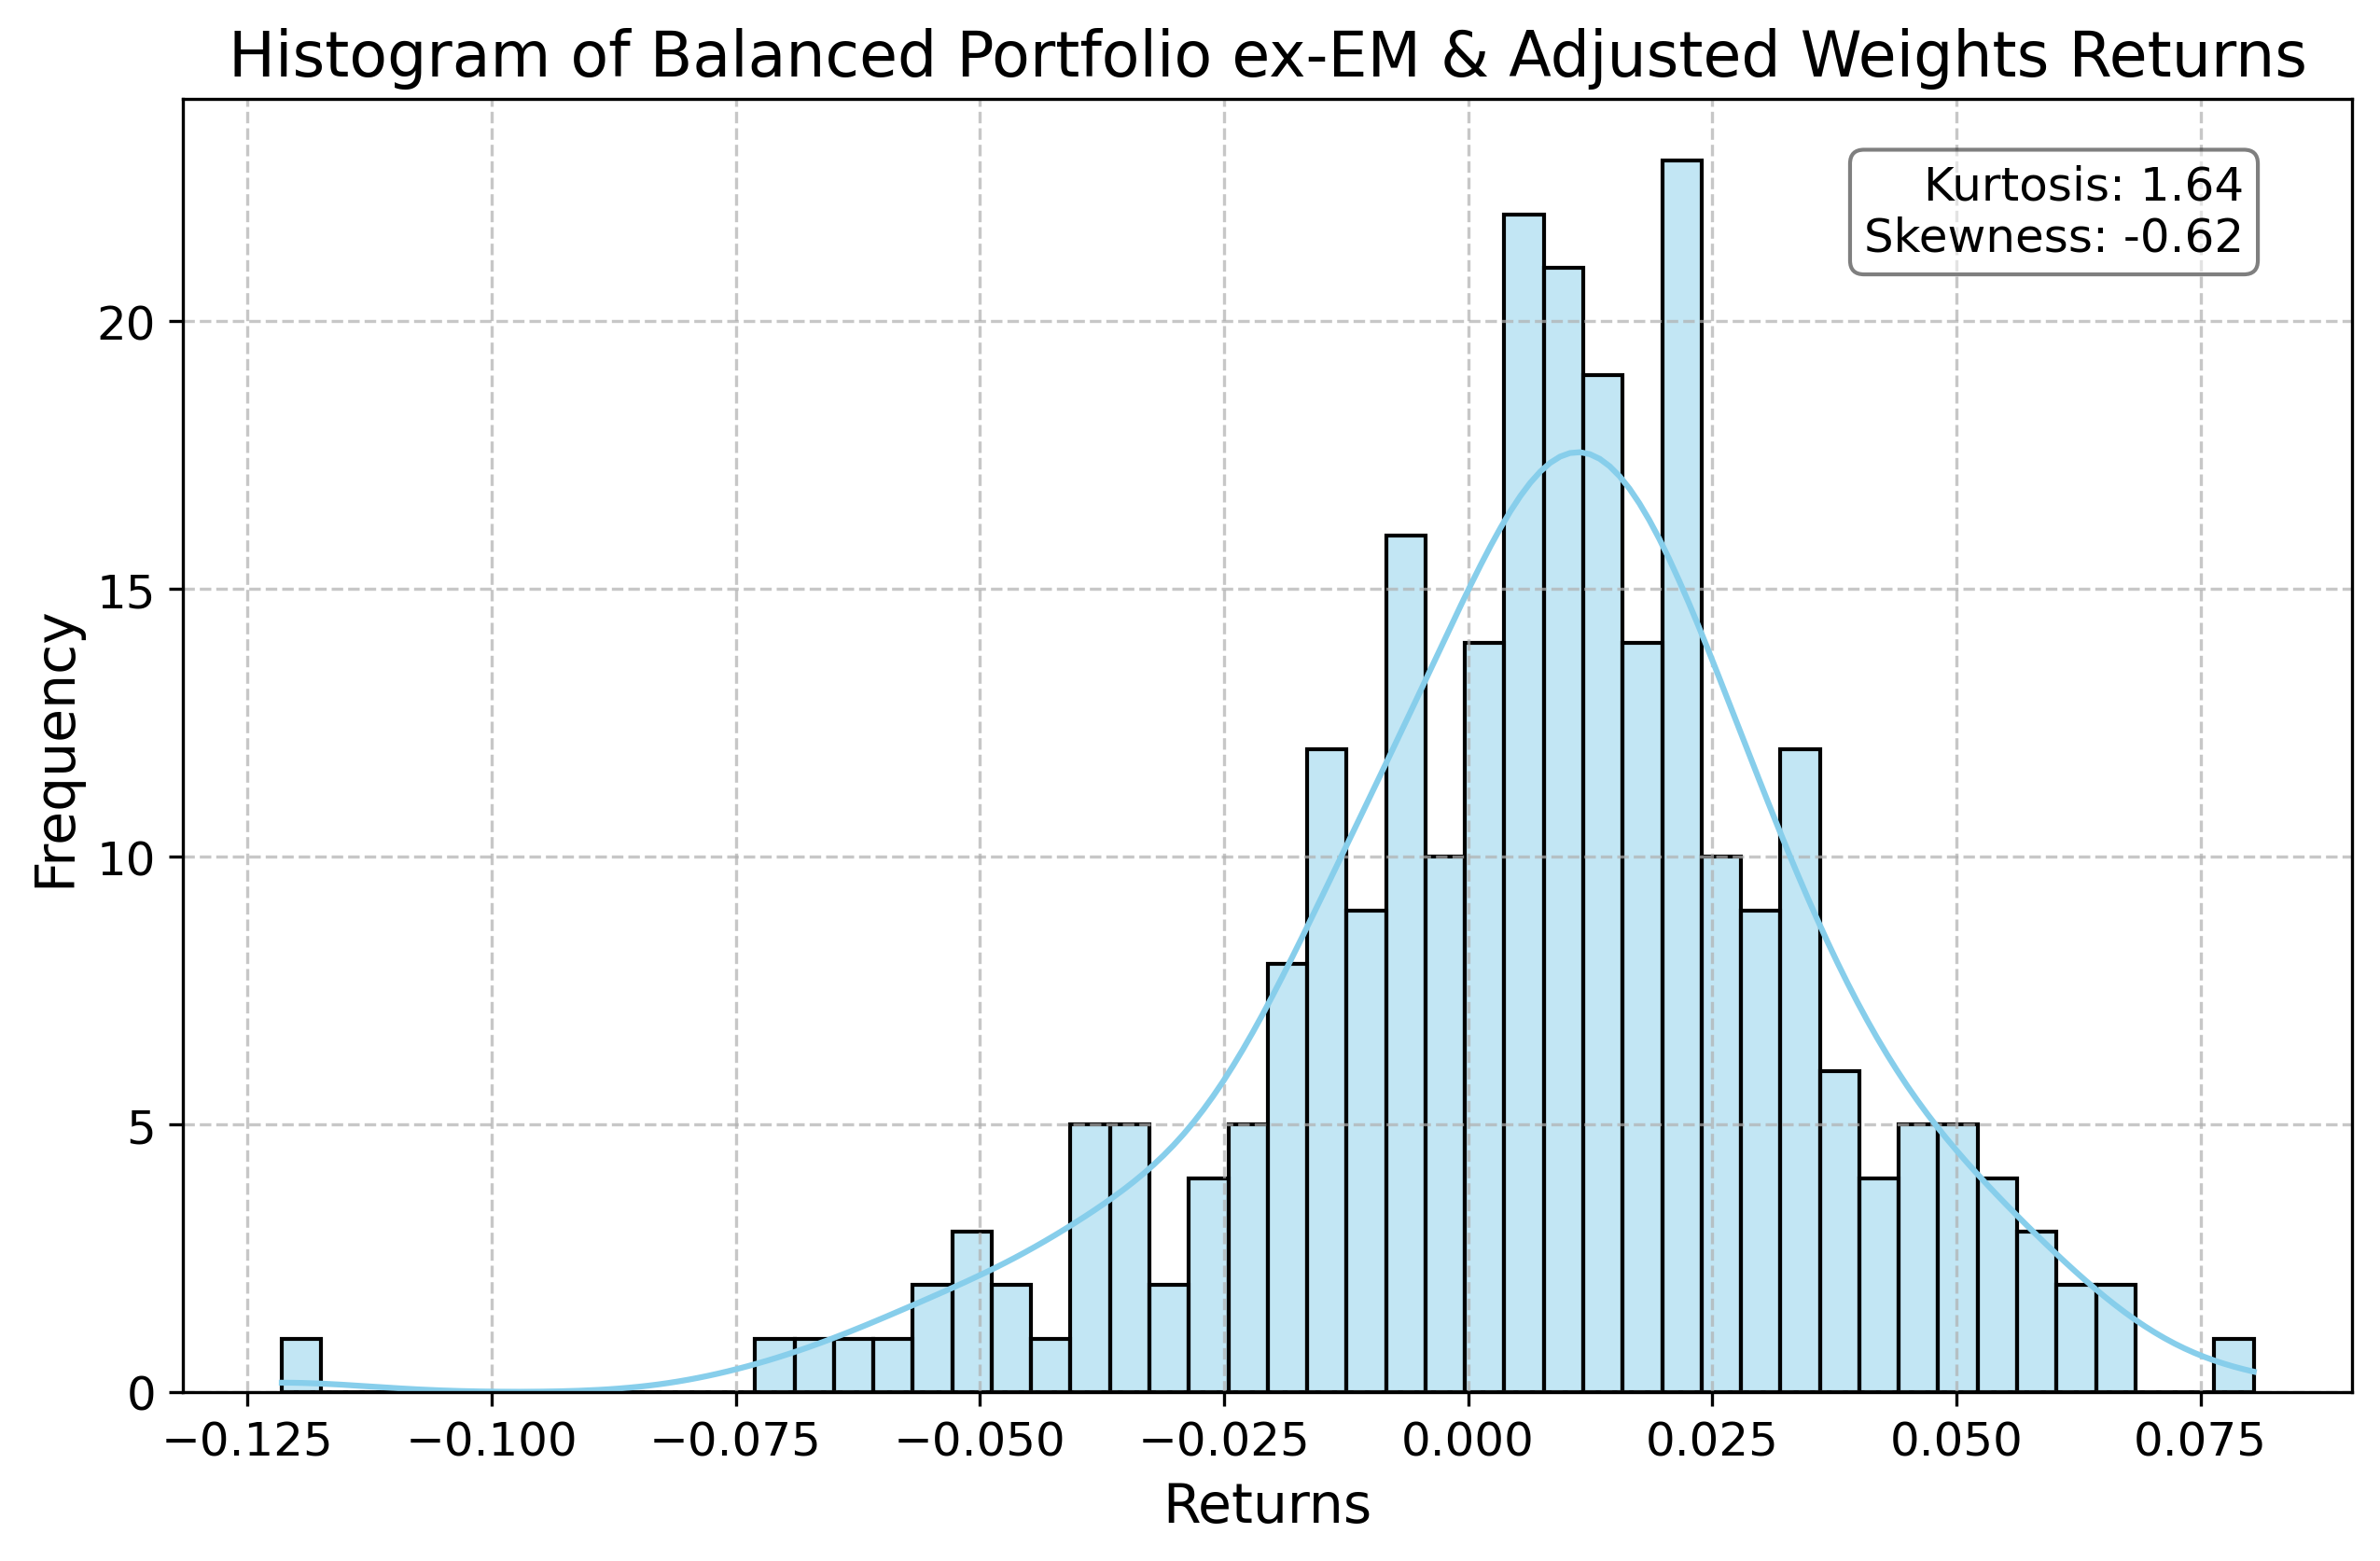

In [110]:
# Plot the histogram
plt.figure(figsize=(10, 6),  dpi=300)
sns.histplot(portfolio_returns2, bins=50, kde=True, color='skyblue', edgecolor='black')

# Calculate kurtosis and skewness
kurt = kurtosis(portfolio_returns2)
skewness = skew(portfolio_returns2)

# Add text box with kurtosis and skewness
textstr = f'Kurtosis: {kurt:.2f}\nSkewness: {skewness:.2f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='right', bbox=props)

# Add labels and title
plt.title('Histogram of Balanced Portfolio ex-EM & Adjusted Weights Returns', fontsize=16)
plt.xlabel('Returns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [111]:
# Parameters of the Bond ETF
yield_rate = 0.0265       # Current yield (2.65%)
duration = 7.18           # Duration in years
convexity = 7.01          # Convexity
maturity = 8.70           # Maturity in years

# Changes in yield (150 bps increase and decrease)
delta_yields = [0.015, -0.015]  # +1.5% and -1.5%

# Portfolio weights scenarios
weights = [0.20, 0.15]  # 20% and 15%

# Initialize a dictionary to store results
results = {}

for delta_y in delta_yields:
    # Calculate percentage price change using duration and convexity
    delta_p_over_p = (-duration * delta_y) + (0.5 * convexity * (delta_y ** 2))
    delta_p_over_p_percent = delta_p_over_p * 100  # Convert to percentage
    
    # Store results for each weight scenario
    for weight in weights:
        portfolio_impact = weight * delta_p_over_p_percent  # Portfolio impact in percentage
        scenario = f"Yield Change: {delta_y*100:+.1f}%, Weight: {weight*100:.0f}%"
        results[scenario] = portfolio_impact

# Display the results
print("Impact on Portfolio:")
for scenario, impact in results.items():
    print(f"{scenario}: {impact:.2f}%")

Impact on Portfolio:
Yield Change: +1.5%, Weight: 20%: -2.14%
Yield Change: +1.5%, Weight: 15%: -1.60%
Yield Change: -1.5%, Weight: 20%: 2.17%
Yield Change: -1.5%, Weight: 15%: 1.63%


**END OF FILE**